In [42]:
# απαραίτητες βιβλιοθήκες που θα χρειαστούν στην συνέχεια 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
np.logspace(-4, 4, 5)

array([1.e-04, 1.e-02, 1.e+00, 1.e+02, 1.e+04])

In [2]:
# Automatic dataset loading
!gdown --id 1NB1cVDGXMRU3hQj7h10zzoJcnNfHsAZU

/usr/local/lib/python3.8/dist-packages/gdown/cli.py:127: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1NB1cVDGXMRU3hQj7h10zzoJcnNfHsAZU
To: /content/dataset.csv
100% 55.2k/55.2k [00:00<00:00, 44.4MB/s]


In [3]:
filename = "dataset.csv"  
df = pd.read_csv(filename, sep=';')
df

,BCRPATIENTBARCODE,AgeAtDiagnosis (yrs),VITALSTATUS,TUMORSTAGE,TUMORGRADE,TUMORRESIDUALDISEASE,PRIMARYTHERAPYOUTCOMESUCCESS,PERSONNEOPLASMCANCERSTATUS,OverallSurvival(mos),ProgressionFreeStatus,ProgressionFreeSurvival (mos)#,PlatinumFreeInterval (mos)*,PlatinumStatus
0,TCGA-61-1895,"52,21",LIVING,IIIB,G3,No Macroscopic disease,STABLE DISEASE,TUMOR FREE,"1,54",DiseaseFree,"1,54","-3,70",Tooearly
1,TCGA-13-1510,"62,21",LIVING,IIIC,G3,No Macroscopic disease,NaN,TUMOR FREE,"2,56",DiseaseFree,"2,56","-3,21",Tooearly
2,TCGA-23-1809,"63,32",LIVING,IIC,G3,1-10 mm,NaN,NaN,"0,52",DiseaseFree,"0,52","-3,10",Tooearly
3,TCGA-20-1687,"46,47",LIVING,IV,G3,No Macroscopic disease,COMPLETE RESPONSE,TUMOR FREE,"2,62",DiseaseFree,"2,62","-2,90",Tooearly
4,TCGA-13-1404,"48,72",LIVING,IIIC,G3,1-10 mm,COMPLETE RESPONSE,TUMOR FREE,"6,59",DiseaseFree,"6,59","-2,50",Tooearly
...,...,...,...,...,...,...,...,...,...,...,...,...,...
483,TCGA-59-2355,NaN,DECEASED,IV,G3,>20mm,NaN,WITH TUMOR,"2,13",Recurred/Progressed,Missing,NaN,Missing
484,TCGA-59-2352,NaN,DECEASED,IIIC,G3,NaN,NaN,WITH TUMOR,"8,20",Recurred/Progressed,Missing,NaN,Missing
485,TCGA-57-1582,NaN,DECEASED,IIIC,G3,1-10 mm,PROGRESSIVE DISEASE,WITH TUMOR,"23,97",Recurred/Progressed,Missing,NaN,Missing
486,TCGA-04-1519,"48,39",NaN,IIIC,G3,NaN,NaN,NaN,NaN,NaN,Missing,NaN,Missing


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 488 entries, 0 to 487
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   BCRPATIENTBARCODE               488 non-null    object
 1   AgeAtDiagnosis (yrs)            477 non-null    object
 2   VITALSTATUS                     483 non-null    object
 3   TUMORSTAGE                      484 non-null    object
 4   TUMORGRADE                      477 non-null    object
 5   TUMORRESIDUALDISEASE            432 non-null    object
 6   PRIMARYTHERAPYOUTCOMESUCCESS    395 non-null    object
 7   PERSONNEOPLASMCANCERSTATUS      432 non-null    object
 8   OverallSurvival(mos)            482 non-null    object
 9   ProgressionFreeStatus           486 non-null    object
 10  ProgressionFreeSurvival (mos)#  488 non-null    object
 11  PlatinumFreeInterval (mos)*     347 non-null    object
 12  PlatinumStatus                  488 non-null    ob

## Περιγραφή attributes

**BCRPATIENTBARCODE**: ένα απλό id

**AgeAtDiagnosis (yrs)**: Ηλικία ασθενούς όταν έγινε η διάγνωση / γενικά σε πολλά χρησιμοποιοεί την ημέρα του χειρουργίου σαν αρχική καθώς τότε ξεκινάει η θεραπεία, μέσος όρος περίπου 60

In [ ]:
df['AgeAtDiagnosis (yrs)'].value_counts(dropna=False)

NaN      11
82,17     2
60,11     2
58,69     2
76,43     2
         ..
47,86     1
77,26     1
73,98     1
71,23     1
48,39     1
Name: AgeAtDiagnosis (yrs), Length: 456, dtype: int64

**VITAL STATUS**: Class label -
Από εξόρυξη οταν λείπει η ετικέτα κάνουμε ignore το συγκεκριμένο δείγμα

In [ ]:
df['VITALSTATUS'].value_counts(dropna=False)

DECEASED    268
LIVING      215
NaN           5
Name: VITALSTATUS, dtype: int64

**TUMOR STAGE**: I-IV 
For more info check here: https://www.cancer.org/cancer/ovarian-cancer/detection-diagnosis-staging/staging.html

Σε γενικές γραμμές όσο πάμε προς το 4 είναι χειρότερο και το 3C είναι χειρότερο από 3B

In [ ]:
df['TUMORSTAGE'].value_counts(dropna=False)

IIIC    353
IV       79
IIIB     21
IIC      17
IIIA      7
IIB       4
NaN       4
IIA       3
Name: TUMORSTAGE, dtype: int64

**Tumor grade 2 and 3** in ovarian cancer refer to different levels of cell differentiation or abnormality, and can provide important information about the aggressiveness and potential for growth of the cancer.

In general, tumor grade is assigned based on the appearance of cancer cells under a microscope, and is categorized on a scale from 1 to 3, with higher numbers indicating more abnormal and aggressive cells.

For ovarian cancer, the grading system is based on the degree of differentiation of the tumor cells, or how closely they resemble normal ovarian tissue. The grading is determined by pathologists who analyze tissue samples taken during a biopsy or surgery.

Specifically, the grades for ovarian cancer are:

Grade 1: The tumor cells closely resemble normal ovarian tissue, and are generally considered to be well-differentiated.

Grade 2: The tumor cells are moderately differentiated, and may have some abnormal features.

Grade 3: The tumor cells are poorly differentiated or undifferentiated, and have more abnormal and aggressive features.

A higher grade tumor is generally associated with a poorer prognosis and a higher likelihood of the cancer spreading to other parts of the body. Treatment options and recommendations for ovarian cancer will depend on a variety of factors, including tumor grade, stage, and individual patient characteristics, and should be discussed with a healthcare professional.

https://targetovariancancer.org.uk/about-ovarian-cancer/what-ovarian-cancer/stages-and-grades

In [ ]:
df['TUMORGRADE'].value_counts(dropna=False)

G3     420
G2      57
NaN     11
Name: TUMORGRADE, dtype: int64


**TUMORRESIDUALDISEASE** was defined as the size of residual disease at the conclusion of the primary surgical procedure.  This field was used to define surgical cytoreduction as optimal or suboptimal. Optimal was defined as no residual disease greater than 1cm and  included the variable categories of no macroscopic disease (i.e. microscopic residual disease) and 1 to 10mm. Suboptimal was defined as residual disease greater than 1cm and  included the variable categories of 11 to 20mm and greater than 20mm

δλδ το χώρισαν σε δύο κατηγορίες: optimal (No Microscopic deasease & 1-10) and Suboptimal (11-20 & >20), υπάρχουν κάποια null values 

Tumor residual disease, also known as residual cancer, refers to the presence of cancer cells or tumor tissue remaining in the body after initial cancer treatment, such as surgery, chemotherapy, or radiation therapy.

In [ ]:
df['TUMORRESIDUALDISEASE'].value_counts(dropna=False)

1-10 mm                   223
No Macroscopic disease     90
>20mm                      89
NaN                        56
11-20 mm                   30
Name: TUMORRESIDUALDISEASE, dtype: int64


**PRIMARY THERAPY OUTCOME SUCCESS** was defined as the response to treatment determined after primary surgery and subsequent adjuvant chemotherapy: 

Complete response: A complete response means that the cancer has been completely eliminated or has disappeared following treatment. Imaging tests and/or biopsies show no evidence of the cancer, and the patient is considered to be in remission.

Partial response: A partial response means that the cancer has shrunk in size or extent following treatment, but is still present. Imaging tests and/or biopsies show that the cancer has responded to treatment, but there is still evidence of some cancer remaining.

Progressive disease: Progressive disease means that the cancer has continued to grow or spread following treatment. Imaging tests and/or biopsies show that the cancer has not responded to treatment, and may have become more aggressive.

Stable disease: Stable disease means that the cancer has not grown or spread significantly following treatment. Imaging tests and/or biopsies show that the cancer has not responded to treatment, but has not become more aggressive either.

Disclaimer: Βρήκα τι σημαίνουν δεν το εξηγούσε το supplement του άρθρου

In [ ]:
df['PRIMARYTHERAPYOUTCOMESUCCESS'].value_counts(dropna=False)

COMPLETE RESPONSE      276
NaN                     93
PARTIAL RESPONSE        57
PROGRESSIVE DISEASE     37
STABLE DISEASE          25
Name: PRIMARYTHERAPYOUTCOMESUCCESS, dtype: int64

**PERSONNEOPLASMCANCERSTATUS** was defined as the last known status of disease.  For the purpose of these analyses, the date of surgery was used as a surrogate for the date of initial diagnosis, since treatment planning and intervention for these cases undergoing initial surgical resection began at that time point



In [ ]:
df['PERSONNEOPLASMCANCERSTATUS'].value_counts(dropna=False)

WITH TUMOR    323
TUMOR FREE    109
NaN            56
Name: PERSONNEOPLASMCANCERSTATUS, dtype: int64

**Overall survival** was defined as the interval from the date of initial surgical resection to the date of last known contact or death.  **Progression free survival** was defined as the interval from the date of initial surgical resection to the date of progression, date of recurrence, or date of last known contact if the patient was alive and has not recurred.  For the purpose of these analyses, any patient who had died without a date of progression or recurrence was excluded from analyses of progression free survival.

Αν κάποιος έχει θεραπευτεί βγάζει νόημα το Overall Survival = Progression free survival 

Επίσης βγάζει νόημα το Overall Survival >= Progression free survival

ProgressionFreeSurvival is missing if the patient has progressed/recurred and there is no date of progression/recurrence indicated or the patient is dead and no date of progression/recurrence is indicated.

Εξτρα ορισμοί: Μπορεί να είναι contradictory: 

Progression-free survival (PFS) is a term used in cancer treatment that refers to the length of time during which a patient's cancer does not progress or worsen after starting a specific treatment.

Overall survival (OS) is a term used in cancer treatment that refers to the length of time a patient lives from the time of their cancer diagnosis to the time of their death from any cause.

In cancer terms, **progression and recurrence** refer to the growth and spread of cancer cells in the body, and are important concepts in cancer diagnosis, treatment, and management.

Progression refers to the growth and spread of cancer cells in the body. It occurs when cancer cells continue to grow and divide, invading nearby tissues and organs or spreading to other parts of the body through the bloodstream or lymphatic system. The term "progression" is typically used to describe a patient's disease status after treatment, and can be assessed by imaging studies, such as CT scans or MRIs, or by other diagnostic tests.

Recurrence, on the other hand, refers to the return of cancer after a period of time during which the disease was not detectable. It can occur in the same location as the original cancer, known as a local recurrence, or in another part of the body, known as a distant recurrence. Recurrence can happen after initial treatment, and may occur months or even years later. It is typically detected through imaging studies or other diagnostic tests, such as blood tests or biopsies.

Both progression and recurrence are important concepts in cancer management, as they can impact a patient's treatment options and overall prognosis. The goal of cancer treatment is to prevent or delay progression and recurrence as much as possible, in order to improve a patient's outcomes and quality of life.





In [ ]:
df['ProgressionFreeStatus'].value_counts(dropna=False)

Recurred/Progressed    349
DiseaseFree            137
NaN                      2
Name: ProgressionFreeStatus, dtype: int64

Ορισμός platinum sensitive cancer:
https://www.cancer.gov/publications/dictionaries/cancer-terms/def/platinum-sensitive-cancer

Cancer that responds to treatment with anticancer drugs that contain the metal platinum, such as cisplatin and carboplatin. Some cancers that respond to treatment but then come back after a certain period may also be considered platinum sensitive. For example, ovarian cancer that comes back 6 or more months after platinum-based treatment is considered platinum sensitive. Knowing whether cancer is platinum sensitive may help plan further treatment.

The **platinum free interval** was defined as the interval from the date of last primary platinum treatment to the date of progression, date of recurrence, or date of last known contact if the patient is alive and has not recurred. (Σε μήνες)

The PlatinumFreeInterval is negative if the patient had received treatment after the date of progression/recurrence or if the date of last platinum treatment is after the date of last follow-up.

**Platinum status** was defined as resistant if the platinum free interval was less than six months and the patient had progressed or recurred.  Platinum status was defined as sensitive if the platinum free interval is six months or greater, there was no evidence of progression or recurrence, and the follow-up interval was at least six months from the date of last primary platinum treatment.  Patients who have not progressed or recurred and been followed for less than six months from the date of last primary platinum treatment were excluded from analyses regarding platinum status.  

Συνοπτικά: 

*   Resistant: Τελευταία θεραπεία με πλατίνα < 6 μήνες & ο καρκινός επανήλθε ή χειροτέρευσε
*   Sensitive: Τελευταία θεραπεία με πλατίνα > 6 μήνες & είτε επανήλθε είτε χειροτέρευσε είτε θεραπεύτηκε
*   Too early: Τελευταία θεραπεία με πλατίνα < 6 μήνες & θεραπεύτηκε (δεν μπορούμε να είμαστε σίγουροι οτι όντως θεραπεύτηκε)


In [ ]:
df['ProgressionFreeSurvival (mos)#'].value_counts(dropna=False)

Missing    93
9,77        5
8,30        4
11,51       3
9,28        3
           ..
9,61        1
5,25        1
1,57        1
2,66        1
70,13       1
Name: ProgressionFreeSurvival (mos)#, Length: 334, dtype: int64

In [ ]:
df['OverallSurvival(mos)'].value_counts(dropna=False)

NaN      6
19,93    3
8,52     3
49,08    2
19,02    2
        ..
19,11    1
44,20    1
44,52    1
31,80    1
23,97    1
Name: OverallSurvival(mos), Length: 439, dtype: int64

In [ ]:
df['PlatinumFreeInterval (mos)*'].value_counts(dropna=False)

NaN       141
0,00       10
6,70        6
8,00        5
0,80        5
         ... 
3,40        1
3,52        1
3,71        1
3,77        1
106,90      1
Name: PlatinumFreeInterval (mos)*, Length: 237, dtype: int64

In [ ]:
df['PlatinumStatus'].value_counts(dropna=False)

Sensitive    197
Missing      143
Resistant     90
Tooearly      58
Name: PlatinumStatus, dtype: int64

# **Data Preprocessing**

---




After the data has been uploaded and an initial formatting has been done, the next step is data preprocessing. In many classification problems (and machine learning in general) preprocessing is a very important (and often very time-consuming) part of the whole process, but often has a very large impact on system performance.

Preprocessing steps aim to:
* Remove or replace missing values from the dataset
* Convert categorical variables appropriately so that they can be handled by machine learning algorithms
* Select or extract the appropriate features for the model to be trained

In [4]:
!pip install movecolumn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for movecolumn: filename=movecolumn-0.0.7-py3-none-any.whl size=10439 sha256=428802402c9f4fcc9fd62cfec2d9a93e44de3e105c36e708d5979fb2784eed61
  Stored in directory: /root/.cache/pip/wheels/9b/68/f7/673699e3271e448dceb9dba20657c946906ca31a7e7b1cbcce
Successfully built movecolumn


In [5]:
import warnings
warnings.simplefilter(action="ignore", category=DeprecationWarning)
import movecolumn as mc

In [ ]:
print("Dataset has {} rows and {} columns.".format(df.shape[0],df.shape[1]))
print("Also, the first {} of total columns represtent the feauters of this dataset, while the {}st column represent the class of each row otherwise of each sample.".format((df.shape[1]-1),df.shape[1]))

Dataset has 488 rows and 13 columns.
Also, the first 12 of total columns represtent the feauters of this dataset, while the 13st column represent the class of each row otherwise of each sample.


Όπως παρατηρούμε απ'τα παραπάνω το dataset έχει διαστάσεις 488x13, δηλαδή έχει 488 γραμμές που αντιστοιχούν στα δείγματα και 13 στήλες που αντιστοιχούν στα attributes. Επίσης, παρατηρούμε πως υπάρχει αριθμήση γραμμών αλλά και  επικεφαλίδες για τις στήλες. Απ'την παρακάτω επικόσπηση του dataset παρατηρούμε πως οι στήλες του dataset αποτελούνται από 9 στηλές που περιέχουν τιμές τύπου «category-object» και από 4 στήλες που περιέχουν τιμές τύπου «Float64». H μία "category" στήλη με την επικεφαλίδα "VITALSTATUS" είναι και η Target column για εμάς ή αλλιώς το label κάθε δείγματος, όταν οι υπόλοιπες στήλες αποτελούν τα επιμέρους χαρακτηριστικά.

In [ ]:
print("There are {} missing values in the dataset.".format(df.isnull().sum().sum()))

There are 385 missing values in the dataset.


In [ ]:
print("Below is shown the total number of NaN values from each attribute of dataset.")
print()
df.isna().sum()

Below is shown the total number of NaN values from each attribute of dataset.



BCRPATIENTBARCODE                   0
AgeAtDiagnosis (yrs)               11
VITALSTATUS                         5
TUMORSTAGE                          4
TUMORGRADE                         11
TUMORRESIDUALDISEASE               56
PRIMARYTHERAPYOUTCOMESUCCESS       93
PERSONNEOPLASMCANCERSTATUS         56
OverallSurvival(mos)                6
ProgressionFreeStatus               2
ProgressionFreeSurvival (mos)#      0
PlatinumFreeInterval (mos)*       141
PlatinumStatus                      0
dtype: int64

In [6]:
mc.MoveToLast(df,'VITALSTATUS')


,BCRPATIENTBARCODE,AgeAtDiagnosis (yrs),TUMORSTAGE,TUMORGRADE,TUMORRESIDUALDISEASE,PRIMARYTHERAPYOUTCOMESUCCESS,PERSONNEOPLASMCANCERSTATUS,OverallSurvival(mos),ProgressionFreeStatus,ProgressionFreeSurvival (mos)#,PlatinumFreeInterval (mos)*,PlatinumStatus,VITALSTATUS
0,TCGA-61-1895,"52,21",IIIB,G3,No Macroscopic disease,STABLE DISEASE,TUMOR FREE,"1,54",DiseaseFree,"1,54","-3,70",Tooearly,LIVING
1,TCGA-13-1510,"62,21",IIIC,G3,No Macroscopic disease,NaN,TUMOR FREE,"2,56",DiseaseFree,"2,56","-3,21",Tooearly,LIVING
2,TCGA-23-1809,"63,32",IIC,G3,1-10 mm,NaN,NaN,"0,52",DiseaseFree,"0,52","-3,10",Tooearly,LIVING
3,TCGA-20-1687,"46,47",IV,G3,No Macroscopic disease,COMPLETE RESPONSE,TUMOR FREE,"2,62",DiseaseFree,"2,62","-2,90",Tooearly,LIVING
4,TCGA-13-1404,"48,72",IIIC,G3,1-10 mm,COMPLETE RESPONSE,TUMOR FREE,"6,59",DiseaseFree,"6,59","-2,50",Tooearly,LIVING
...,...,...,...,...,...,...,...,...,...,...,...,...,...
483,TCGA-59-2355,NaN,IV,G3,>20mm,NaN,WITH TUMOR,"2,13",Recurred/Progressed,Missing,NaN,Missing,DECEASED
484,TCGA-59-2352,NaN,IIIC,G3,NaN,NaN,WITH TUMOR,"8,20",Recurred/Progressed,Missing,NaN,Missing,DECEASED
485,TCGA-57-1582,NaN,IIIC,G3,1-10 mm,PROGRESSIVE DISEASE,WITH TUMOR,"23,97",Recurred/Progressed,Missing,NaN,Missing,DECEASED
486,TCGA-04-1519,"48,39",IIIC,G3,NaN,NaN,NaN,NaN,NaN,Missing,NaN,Missing,NaN


**Note**:
Since for this analysis the values of the Vital Status column are the class labels, the missing values found in this column lead to the rejection of the corresponding samples from the dataset.

In [7]:
df=df.dropna(subset=['VITALSTATUS'])
df.shape[0]
print("So dataset has now {} rows and {} columns.".format(df.shape[0],df.shape[1]))
df

So dataset has now 483 rows and 13 columns.


,BCRPATIENTBARCODE,AgeAtDiagnosis (yrs),TUMORSTAGE,TUMORGRADE,TUMORRESIDUALDISEASE,PRIMARYTHERAPYOUTCOMESUCCESS,PERSONNEOPLASMCANCERSTATUS,OverallSurvival(mos),ProgressionFreeStatus,ProgressionFreeSurvival (mos)#,PlatinumFreeInterval (mos)*,PlatinumStatus,VITALSTATUS
0,TCGA-61-1895,"52,21",IIIB,G3,No Macroscopic disease,STABLE DISEASE,TUMOR FREE,"1,54",DiseaseFree,"1,54","-3,70",Tooearly,LIVING
1,TCGA-13-1510,"62,21",IIIC,G3,No Macroscopic disease,NaN,TUMOR FREE,"2,56",DiseaseFree,"2,56","-3,21",Tooearly,LIVING
2,TCGA-23-1809,"63,32",IIC,G3,1-10 mm,NaN,NaN,"0,52",DiseaseFree,"0,52","-3,10",Tooearly,LIVING
3,TCGA-20-1687,"46,47",IV,G3,No Macroscopic disease,COMPLETE RESPONSE,TUMOR FREE,"2,62",DiseaseFree,"2,62","-2,90",Tooearly,LIVING
4,TCGA-13-1404,"48,72",IIIC,G3,1-10 mm,COMPLETE RESPONSE,TUMOR FREE,"6,59",DiseaseFree,"6,59","-2,50",Tooearly,LIVING
...,...,...,...,...,...,...,...,...,...,...,...,...,...
481,TCGA-59-2354,NaN,IIIC,G3,1-10 mm,STABLE DISEASE,WITH TUMOR,"34,30",Recurred/Progressed,"15,11",NaN,Missing,DECEASED
482,TCGA-59-2351,NaN,IIIC,G3,1-10 mm,COMPLETE RESPONSE,TUMOR FREE,"115,80",Recurred/Progressed,"70,13",NaN,Missing,LIVING
483,TCGA-59-2355,NaN,IV,G3,>20mm,NaN,WITH TUMOR,"2,13",Recurred/Progressed,Missing,NaN,Missing,DECEASED
484,TCGA-59-2352,NaN,IIIC,G3,NaN,NaN,WITH TUMOR,"8,20",Recurred/Progressed,Missing,NaN,Missing,DECEASED


In [8]:
labels = df.iloc[:,-1]
target_names=labels.unique()
print(target_names)
print("Labels have 2 values: {}.".format(target_names))

['LIVING' 'DECEASED']
Labels have 2 values: ['LIVING' 'DECEASED'].


We can convert the class labels from categorical to integer 0-1 values.

Many machine learning libraries require class labels to be encoded as integers. Although most estimators for classification in scikit-learn internally convert labels to integers, it is considered good practice to provide class labels as integers to avoid any glitches. To encode class labels, we can use an approach similar to ordered attribute mapping. Class tags are unordered, so it doesn't matter what integer we assign to a particular tag, as long as it's unique. So we can simply enumerate the class tags, starting at 0:

In [9]:
class_mapping = {label:idx for idx,label in enumerate(np.unique(df['VITALSTATUS']))}
print(class_mapping)
df['VITALSTATUS'] = df['VITALSTATUS'].map(class_mapping)  
df

{'DECEASED': 0, 'LIVING': 1}


<ipython-input-9-e81485a98fa4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['VITALSTATUS'] = df['VITALSTATUS'].map(class_mapping)


,BCRPATIENTBARCODE,AgeAtDiagnosis (yrs),TUMORSTAGE,TUMORGRADE,TUMORRESIDUALDISEASE,PRIMARYTHERAPYOUTCOMESUCCESS,PERSONNEOPLASMCANCERSTATUS,OverallSurvival(mos),ProgressionFreeStatus,ProgressionFreeSurvival (mos)#,PlatinumFreeInterval (mos)*,PlatinumStatus,VITALSTATUS
0,TCGA-61-1895,"52,21",IIIB,G3,No Macroscopic disease,STABLE DISEASE,TUMOR FREE,"1,54",DiseaseFree,"1,54","-3,70",Tooearly,1
1,TCGA-13-1510,"62,21",IIIC,G3,No Macroscopic disease,NaN,TUMOR FREE,"2,56",DiseaseFree,"2,56","-3,21",Tooearly,1
2,TCGA-23-1809,"63,32",IIC,G3,1-10 mm,NaN,NaN,"0,52",DiseaseFree,"0,52","-3,10",Tooearly,1
3,TCGA-20-1687,"46,47",IV,G3,No Macroscopic disease,COMPLETE RESPONSE,TUMOR FREE,"2,62",DiseaseFree,"2,62","-2,90",Tooearly,1
4,TCGA-13-1404,"48,72",IIIC,G3,1-10 mm,COMPLETE RESPONSE,TUMOR FREE,"6,59",DiseaseFree,"6,59","-2,50",Tooearly,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
481,TCGA-59-2354,NaN,IIIC,G3,1-10 mm,STABLE DISEASE,WITH TUMOR,"34,30",Recurred/Progressed,"15,11",NaN,Missing,0
482,TCGA-59-2351,NaN,IIIC,G3,1-10 mm,COMPLETE RESPONSE,TUMOR FREE,"115,80",Recurred/Progressed,"70,13",NaN,Missing,1
483,TCGA-59-2355,NaN,IV,G3,>20mm,NaN,WITH TUMOR,"2,13",Recurred/Progressed,Missing,NaN,Missing,0
484,TCGA-59-2352,NaN,IIIC,G3,NaN,NaN,WITH TUMOR,"8,20",Recurred/Progressed,Missing,NaN,Missing,0


In [ ]:
df

,BCRPATIENTBARCODE,AgeAtDiagnosis (yrs),TUMORSTAGE,TUMORGRADE,TUMORRESIDUALDISEASE,PRIMARYTHERAPYOUTCOMESUCCESS,PERSONNEOPLASMCANCERSTATUS,OverallSurvival(mos),ProgressionFreeStatus,ProgressionFreeSurvival (mos)#,PlatinumFreeInterval (mos)*,PlatinumStatus,VITALSTATUS
0,TCGA-61-1895,"52,21",IIIB,G3,No Macroscopic disease,STABLE DISEASE,TUMOR FREE,"1,54",DiseaseFree,"1,54","-3,70",Tooearly,1
1,TCGA-13-1510,"62,21",IIIC,G3,No Macroscopic disease,NaN,TUMOR FREE,"2,56",DiseaseFree,"2,56","-3,21",Tooearly,1
2,TCGA-23-1809,"63,32",IIC,G3,1-10 mm,NaN,NaN,"0,52",DiseaseFree,"0,52","-3,10",Tooearly,1
3,TCGA-20-1687,"46,47",IV,G3,No Macroscopic disease,COMPLETE RESPONSE,TUMOR FREE,"2,62",DiseaseFree,"2,62","-2,90",Tooearly,1
4,TCGA-13-1404,"48,72",IIIC,G3,1-10 mm,COMPLETE RESPONSE,TUMOR FREE,"6,59",DiseaseFree,"6,59","-2,50",Tooearly,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
481,TCGA-59-2354,NaN,IIIC,G3,1-10 mm,STABLE DISEASE,WITH TUMOR,"34,30",Recurred/Progressed,"15,11",NaN,Missing,0
482,TCGA-59-2351,NaN,IIIC,G3,1-10 mm,COMPLETE RESPONSE,TUMOR FREE,"115,80",Recurred/Progressed,"70,13",NaN,Missing,1
483,TCGA-59-2355,NaN,IV,G3,>20mm,NaN,WITH TUMOR,"2,13",Recurred/Progressed,Missing,NaN,Missing,0
484,TCGA-59-2352,NaN,IIIC,G3,NaN,NaN,WITH TUMOR,"8,20",Recurred/Progressed,Missing,NaN,Missing,0


The same approach from categorical type to integer type conversion is followed also in columns:

*   PRIMARYTHERAPYOUTCOMESUCCESS
*   PERSONNEOPLASMCANCERSTATUS
*   ProgressionFreeStatus
*   PlatinumStatus

https://stackoverflow.com/questions/54444260/labelencoder-that-keeps-missing-values-as-nan

In [ ]:
df.columns

Index(['BCRPATIENTBARCODE', 'AgeAtDiagnosis (yrs)', 'TUMORSTAGE', 'TUMORGRADE',
       'TUMORRESIDUALDISEASE', 'PRIMARYTHERAPYOUTCOMESUCCESS',
       'PERSONNEOPLASMCANCERSTATUS', 'OverallSurvival(mos)',
       'ProgressionFreeStatus', 'ProgressionFreeSurvival (mos)#',
       'PlatinumFreeInterval (mos)*', 'PlatinumStatus', 'VITALSTATUS'],
      dtype='object')

In [ ]:
print("Primary therapy column can have the following values: {}.".format(df.iloc[:,5].unique()))

Primary therapy column can have the following values: ['STABLE DISEASE' nan 'COMPLETE RESPONSE' 'PARTIAL RESPONSE'
 'PROGRESSIVE DISEASE'].


In [ ]:
df

,BCRPATIENTBARCODE,AgeAtDiagnosis (yrs),TUMORSTAGE,TUMORGRADE,TUMORRESIDUALDISEASE,PRIMARYTHERAPYOUTCOMESUCCESS,PERSONNEOPLASMCANCERSTATUS,OverallSurvival(mos),ProgressionFreeStatus,ProgressionFreeSurvival (mos)#,PlatinumFreeInterval (mos)*,PlatinumStatus,VITALSTATUS
0,TCGA-61-1895,"52,21",IIIB,G3,No Macroscopic disease,STABLE DISEASE,TUMOR FREE,"1,54",DiseaseFree,"1,54","-3,70",Tooearly,1
1,TCGA-13-1510,"62,21",IIIC,G3,No Macroscopic disease,NaN,TUMOR FREE,"2,56",DiseaseFree,"2,56","-3,21",Tooearly,1
2,TCGA-23-1809,"63,32",IIC,G3,1-10 mm,NaN,NaN,"0,52",DiseaseFree,"0,52","-3,10",Tooearly,1
3,TCGA-20-1687,"46,47",IV,G3,No Macroscopic disease,COMPLETE RESPONSE,TUMOR FREE,"2,62",DiseaseFree,"2,62","-2,90",Tooearly,1
4,TCGA-13-1404,"48,72",IIIC,G3,1-10 mm,COMPLETE RESPONSE,TUMOR FREE,"6,59",DiseaseFree,"6,59","-2,50",Tooearly,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
481,TCGA-59-2354,NaN,IIIC,G3,1-10 mm,STABLE DISEASE,WITH TUMOR,"34,30",Recurred/Progressed,"15,11",NaN,Missing,0
482,TCGA-59-2351,NaN,IIIC,G3,1-10 mm,COMPLETE RESPONSE,TUMOR FREE,"115,80",Recurred/Progressed,"70,13",NaN,Missing,1
483,TCGA-59-2355,NaN,IV,G3,>20mm,NaN,WITH TUMOR,"2,13",Recurred/Progressed,Missing,NaN,Missing,0
484,TCGA-59-2352,NaN,IIIC,G3,NaN,NaN,WITH TUMOR,"8,20",Recurred/Progressed,Missing,NaN,Missing,0


In [10]:
df1 = pd.get_dummies(df, columns=['PRIMARYTHERAPYOUTCOMESUCCESS'])
df1.loc[df['PRIMARYTHERAPYOUTCOMESUCCESS'].isnull(), df1.columns.str.startswith
        ("PRIMARYTHERAPYOUTCOMESUCCESS")] = np.nan
df=df1
df1 = pd.get_dummies(df, columns=['PERSONNEOPLASMCANCERSTATUS'])
df1.loc[df['PERSONNEOPLASMCANCERSTATUS'].isnull(), df1.columns.str.startswith
        ("PERSONNEOPLASMCANCERSTATUS")] = np.nan
df=df1
df1 = pd.get_dummies(df, columns=['ProgressionFreeStatus'])
df1.loc[df['ProgressionFreeStatus'].isnull(), df1.columns.str.startswith
        ("ProgressionFreeStatus")] = np.nan
df=df1


In [11]:
df

,BCRPATIENTBARCODE,AgeAtDiagnosis (yrs),TUMORSTAGE,TUMORGRADE,TUMORRESIDUALDISEASE,OverallSurvival(mos),ProgressionFreeSurvival (mos)#,PlatinumFreeInterval (mos)*,PlatinumStatus,VITALSTATUS,PRIMARYTHERAPYOUTCOMESUCCESS_COMPLETE RESPONSE,PRIMARYTHERAPYOUTCOMESUCCESS_PARTIAL RESPONSE,PRIMARYTHERAPYOUTCOMESUCCESS_PROGRESSIVE DISEASE,PRIMARYTHERAPYOUTCOMESUCCESS_STABLE DISEASE,PERSONNEOPLASMCANCERSTATUS_TUMOR FREE,PERSONNEOPLASMCANCERSTATUS_WITH TUMOR,ProgressionFreeStatus_DiseaseFree,ProgressionFreeStatus_Recurred/Progressed
0,TCGA-61-1895,"52,21",IIIB,G3,No Macroscopic disease,"1,54","1,54","-3,70",Tooearly,1,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
1,TCGA-13-1510,"62,21",IIIC,G3,No Macroscopic disease,"2,56","2,56","-3,21",Tooearly,1,NaN,NaN,NaN,NaN,1.0,0.0,1.0,0.0
2,TCGA-23-1809,"63,32",IIC,G3,1-10 mm,"0,52","0,52","-3,10",Tooearly,1,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0
3,TCGA-20-1687,"46,47",IV,G3,No Macroscopic disease,"2,62","2,62","-2,90",Tooearly,1,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,TCGA-13-1404,"48,72",IIIC,G3,1-10 mm,"6,59","6,59","-2,50",Tooearly,1,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
481,TCGA-59-2354,NaN,IIIC,G3,1-10 mm,"34,30","15,11",NaN,Missing,0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
482,TCGA-59-2351,NaN,IIIC,G3,1-10 mm,"115,80","70,13",NaN,Missing,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
483,TCGA-59-2355,NaN,IV,G3,>20mm,"2,13",Missing,NaN,Missing,0,NaN,NaN,NaN,NaN,0.0,1.0,0.0,1.0
484,TCGA-59-2352,NaN,IIIC,G3,NaN,"8,20",Missing,NaN,Missing,0,NaN,NaN,NaN,NaN,0.0,1.0,0.0,1.0


In [12]:
df1 = pd.get_dummies(df, columns=['PlatinumStatus'])
df1.loc[df['PlatinumStatus']=="Missing", df1.columns.str.startswith
        ('PlatinumStatus')] = np.nan
df=df1
df

,BCRPATIENTBARCODE,AgeAtDiagnosis (yrs),TUMORSTAGE,TUMORGRADE,TUMORRESIDUALDISEASE,OverallSurvival(mos),ProgressionFreeSurvival (mos)#,PlatinumFreeInterval (mos)*,VITALSTATUS,PRIMARYTHERAPYOUTCOMESUCCESS_COMPLETE RESPONSE,...,PRIMARYTHERAPYOUTCOMESUCCESS_PROGRESSIVE DISEASE,PRIMARYTHERAPYOUTCOMESUCCESS_STABLE DISEASE,PERSONNEOPLASMCANCERSTATUS_TUMOR FREE,PERSONNEOPLASMCANCERSTATUS_WITH TUMOR,ProgressionFreeStatus_DiseaseFree,ProgressionFreeStatus_Recurred/Progressed,PlatinumStatus_Missing,PlatinumStatus_Resistant,PlatinumStatus_Sensitive,PlatinumStatus_Tooearly
0,TCGA-61-1895,"52,21",IIIB,G3,No Macroscopic disease,"1,54","1,54","-3,70",1,0.0,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,TCGA-13-1510,"62,21",IIIC,G3,No Macroscopic disease,"2,56","2,56","-3,21",1,NaN,...,NaN,NaN,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,TCGA-23-1809,"63,32",IIC,G3,1-10 mm,"0,52","0,52","-3,10",1,NaN,...,NaN,NaN,NaN,NaN,1.0,0.0,0.0,0.0,0.0,1.0
3,TCGA-20-1687,"46,47",IV,G3,No Macroscopic disease,"2,62","2,62","-2,90",1,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,TCGA-13-1404,"48,72",IIIC,G3,1-10 mm,"6,59","6,59","-2,50",1,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
481,TCGA-59-2354,NaN,IIIC,G3,1-10 mm,"34,30","15,11",NaN,0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,NaN,NaN,NaN,NaN
482,TCGA-59-2351,NaN,IIIC,G3,1-10 mm,"115,80","70,13",NaN,1,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN
483,TCGA-59-2355,NaN,IV,G3,>20mm,"2,13",Missing,NaN,0,NaN,...,NaN,NaN,0.0,1.0,0.0,1.0,NaN,NaN,NaN,NaN
484,TCGA-59-2352,NaN,IIIC,G3,NaN,"8,20",Missing,NaN,0,NaN,...,NaN,NaN,0.0,1.0,0.0,1.0,NaN,NaN,NaN,NaN


In [13]:
mc.MoveToLast(df,'VITALSTATUS')


,BCRPATIENTBARCODE,AgeAtDiagnosis (yrs),TUMORSTAGE,TUMORGRADE,TUMORRESIDUALDISEASE,OverallSurvival(mos),ProgressionFreeSurvival (mos)#,PlatinumFreeInterval (mos)*,PRIMARYTHERAPYOUTCOMESUCCESS_COMPLETE RESPONSE,PRIMARYTHERAPYOUTCOMESUCCESS_PARTIAL RESPONSE,...,PRIMARYTHERAPYOUTCOMESUCCESS_STABLE DISEASE,PERSONNEOPLASMCANCERSTATUS_TUMOR FREE,PERSONNEOPLASMCANCERSTATUS_WITH TUMOR,ProgressionFreeStatus_DiseaseFree,ProgressionFreeStatus_Recurred/Progressed,PlatinumStatus_Missing,PlatinumStatus_Resistant,PlatinumStatus_Sensitive,PlatinumStatus_Tooearly,VITALSTATUS
0,TCGA-61-1895,"52,21",IIIB,G3,No Macroscopic disease,"1,54","1,54","-3,70",0.0,0.0,...,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1
1,TCGA-13-1510,"62,21",IIIC,G3,No Macroscopic disease,"2,56","2,56","-3,21",NaN,NaN,...,NaN,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1
2,TCGA-23-1809,"63,32",IIC,G3,1-10 mm,"0,52","0,52","-3,10",NaN,NaN,...,NaN,NaN,NaN,1.0,0.0,0.0,0.0,0.0,1.0,1
3,TCGA-20-1687,"46,47",IV,G3,No Macroscopic disease,"2,62","2,62","-2,90",1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1
4,TCGA-13-1404,"48,72",IIIC,G3,1-10 mm,"6,59","6,59","-2,50",1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
481,TCGA-59-2354,NaN,IIIC,G3,1-10 mm,"34,30","15,11",NaN,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,NaN,NaN,NaN,NaN,0
482,TCGA-59-2351,NaN,IIIC,G3,1-10 mm,"115,80","70,13",NaN,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,1
483,TCGA-59-2355,NaN,IV,G3,>20mm,"2,13",Missing,NaN,NaN,NaN,...,NaN,0.0,1.0,0.0,1.0,NaN,NaN,NaN,NaN,0
484,TCGA-59-2352,NaN,IIIC,G3,NaN,"8,20",Missing,NaN,NaN,NaN,...,NaN,0.0,1.0,0.0,1.0,NaN,NaN,NaN,NaN,0


In [14]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [ ]:
df.isna().sum()

BCRPATIENTBARCODE                                     0
AgeAtDiagnosis (yrs)                                  9
TUMORSTAGE                                            2
TUMORGRADE                                           10
TUMORRESIDUALDISEASE                                 54
OverallSurvival(mos)                                  2
ProgressionFreeSurvival (mos)#                        0
PlatinumFreeInterval (mos)*                         137
PRIMARYTHERAPYOUTCOMESUCCESS_COMPLETE RESPONSE       91
PRIMARYTHERAPYOUTCOMESUCCESS_PARTIAL RESPONSE        91
PRIMARYTHERAPYOUTCOMESUCCESS_PROGRESSIVE DISEASE     91
PRIMARYTHERAPYOUTCOMESUCCESS_STABLE DISEASE          91
PERSONNEOPLASMCANCERSTATUS_TUMOR FREE                53
PERSONNEOPLASMCANCERSTATUS_WITH TUMOR                53
ProgressionFreeStatus_DiseaseFree                     0
ProgressionFreeStatus_Recurred/Progressed             0
PlatinumStatus_Missing                              139
PlatinumStatus_Resistant                        

#**Ordinal Encoder**

Some of the attributes are ordinal, so their type is categorical but somehow their different labels are ordered. To be more specific there attributes are the following:


*   TUMORSTAGE
*   TUMORGRADE
*   TUMORRESIDUALDISEASE








In [ ]:
print("For attribute 'TUMORSTAGE' these are the different valid values that can be excluding the nan value {} .".format(df.TUMORSTAGE.unique()))
print()
print("For attribute 'TUMORGRADE' these are the different valid values that can be excluding the nan value {} .".format(df.TUMORGRADE.unique()))
print()
print("For attribute 'TUMORRESIDUALDISEASE' these are the different valid values that can be excluding the nan value {} .".format(df.TUMORRESIDUALDISEASE.unique()))

For attribute 'TUMORSTAGE' these are the different valid values that can be excluding the nan value ['IIIB' 'IIIC' 'IIC' 'IV' 'IIB' 'IIA' nan 'IIIA'] .

For attribute 'TUMORGRADE' these are the different valid values that can be excluding the nan value ['G3' nan 'G2'] .

For attribute 'TUMORRESIDUALDISEASE' these are the different valid values that can be excluding the nan value ['No Macroscopic disease' '1-10 mm' nan '>20mm' '11-20 mm'] .


In [15]:
encoders = dict()

for col_name in ('TUMORSTAGE','TUMORGRADE','TUMORRESIDUALDISEASE'):
    series = df[col_name]
    label_encoder = LabelEncoder()
    df[col_name] = pd.Series(label_encoder.fit_transform(series[series.notnull()]),index=series[series.notnull()].index)
    encoders[col_name] = label_encoder

**TUMOR RESIDUALDISEASE**

|                             |   |
|-----------------------------|---|
| 1-10 mm                     | 0 |
| 11-20 mm                    | 1 |
| >20mm                       | 2 |
| No Macroscopic disease      | 3 |





**TUMORSTAGE**

|       |   |
|-------|---|
| IIA   | 0 |
| IIB   | 1 |
| IIC   | 2 |
| IIIA  | 3 |
| IIIB  | 4 |
| IIIC  | 5 |
| IV    | 6 |




**TUMORGRADE**

|    |   |
|----|---|
| G2 | 0 |
| G3 | 1 |

In [16]:
df=df.iloc[:,1:]
df

,AgeAtDiagnosis (yrs),TUMORSTAGE,TUMORGRADE,TUMORRESIDUALDISEASE,OverallSurvival(mos),ProgressionFreeSurvival (mos)#,PlatinumFreeInterval (mos)*,PRIMARYTHERAPYOUTCOMESUCCESS_COMPLETE RESPONSE,PRIMARYTHERAPYOUTCOMESUCCESS_PARTIAL RESPONSE,PRIMARYTHERAPYOUTCOMESUCCESS_PROGRESSIVE DISEASE,PRIMARYTHERAPYOUTCOMESUCCESS_STABLE DISEASE,PERSONNEOPLASMCANCERSTATUS_TUMOR FREE,PERSONNEOPLASMCANCERSTATUS_WITH TUMOR,ProgressionFreeStatus_DiseaseFree,ProgressionFreeStatus_Recurred/Progressed,PlatinumStatus_Missing,PlatinumStatus_Resistant,PlatinumStatus_Sensitive,PlatinumStatus_Tooearly,VITALSTATUS
0,"52,21",4.0,1.0,3.0,"1,54","1,54","-3,70",0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1
1,"62,21",5.0,1.0,3.0,"2,56","2,56","-3,21",NaN,NaN,NaN,NaN,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1
2,"63,32",2.0,1.0,0.0,"0,52","0,52","-3,10",NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0,0.0,0.0,1.0,1
3,"46,47",6.0,1.0,3.0,"2,62","2,62","-2,90",1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1
4,"48,72",5.0,1.0,0.0,"6,59","6,59","-2,50",1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
481,NaN,5.0,1.0,0.0,"34,30","15,11",NaN,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,NaN,NaN,NaN,NaN,0
482,NaN,5.0,1.0,0.0,"115,80","70,13",NaN,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,1
483,NaN,6.0,1.0,2.0,"2,13",Missing,NaN,NaN,NaN,NaN,NaN,0.0,1.0,0.0,1.0,NaN,NaN,NaN,NaN,0
484,NaN,5.0,1.0,NaN,"8,20",Missing,NaN,NaN,NaN,NaN,NaN,0.0,1.0,0.0,1.0,NaN,NaN,NaN,NaN,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 483 entries, 0 to 485
Data columns (total 20 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   AgeAtDiagnosis (yrs)                              474 non-null    object 
 1   TUMORSTAGE                                        481 non-null    float64
 2   TUMORGRADE                                        473 non-null    float64
 3   TUMORRESIDUALDISEASE                              429 non-null    float64
 4   OverallSurvival(mos)                              481 non-null    object 
 5   ProgressionFreeSurvival (mos)#                    483 non-null    object 
 6   PlatinumFreeInterval (mos)*                       346 non-null    object 
 7   PRIMARYTHERAPYOUTCOMESUCCESS_COMPLETE RESPONSE    392 non-null    float64
 8   PRIMARYTHERAPYOUTCOMESUCCESS_PARTIAL RESPONSE     392 non-null    float64
 9   PRIMARYTHERAPYOUTCOME

As many of the attributes are still of type object as shown above, we have to convert them to float or integer numeric type.

In [17]:
df["AgeAtDiagnosis (yrs)"] = df["AgeAtDiagnosis (yrs)"].replace(',','.',regex=True).astype("float64")
df['PlatinumFreeInterval (mos)*'] = df['PlatinumFreeInterval (mos)*'].replace(',','.',regex=True).astype("float64")
df['OverallSurvival(mos)'] = df['OverallSurvival(mos)'].replace(',','.',regex=True).astype("float64")

In [ ]:
df

,AgeAtDiagnosis (yrs),TUMORSTAGE,TUMORGRADE,TUMORRESIDUALDISEASE,OverallSurvival(mos),ProgressionFreeSurvival (mos)#,PlatinumFreeInterval (mos)*,PRIMARYTHERAPYOUTCOMESUCCESS_COMPLETE RESPONSE,PRIMARYTHERAPYOUTCOMESUCCESS_PARTIAL RESPONSE,PRIMARYTHERAPYOUTCOMESUCCESS_PROGRESSIVE DISEASE,PRIMARYTHERAPYOUTCOMESUCCESS_STABLE DISEASE,PERSONNEOPLASMCANCERSTATUS_TUMOR FREE,PERSONNEOPLASMCANCERSTATUS_WITH TUMOR,ProgressionFreeStatus_DiseaseFree,ProgressionFreeStatus_Recurred/Progressed,PlatinumStatus_Missing,PlatinumStatus_Resistant,PlatinumStatus_Sensitive,PlatinumStatus_Tooearly,VITALSTATUS
0,52.21,4.0,1.0,3.0,1.54,"1,54",-3.70,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1
1,62.21,5.0,1.0,3.0,2.56,"2,56",-3.21,NaN,NaN,NaN,NaN,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1
2,63.32,2.0,1.0,0.0,0.52,"0,52",-3.10,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0,0.0,0.0,1.0,1
3,46.47,6.0,1.0,3.0,2.62,"2,62",-2.90,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1
4,48.72,5.0,1.0,0.0,6.59,"6,59",-2.50,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
481,NaN,5.0,1.0,0.0,34.30,"15,11",NaN,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,NaN,NaN,NaN,NaN,0
482,NaN,5.0,1.0,0.0,115.80,"70,13",NaN,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,1
483,NaN,6.0,1.0,2.0,2.13,Missing,NaN,NaN,NaN,NaN,NaN,0.0,1.0,0.0,1.0,NaN,NaN,NaN,NaN,0
484,NaN,5.0,1.0,NaN,8.20,Missing,NaN,NaN,NaN,NaN,NaN,0.0,1.0,0.0,1.0,NaN,NaN,NaN,NaN,0


In [ ]:
print("Max value of 'ProgressionFreeSurvival (mos)#' column is {} .".format(df['ProgressionFreeSurvival (mos)#'].max()))
print("Min value of 'ProgressionFreeSurvival (mos)#' column is {} .".format(df['ProgressionFreeSurvival (mos)#'].min()))

Max value of 'ProgressionFreeSurvival (mos)#' column is Missing .
Min value of 'ProgressionFreeSurvival (mos)#' column is 0,30 .


**Note**: 

As "ProgressionFreeSurvival" column has many NaN values, it is not effiecient to convert it to type float, as all the NaN values will get a non NaN value and our data will be misinterpreted.


In [18]:
for i in range(len(df)):
  if df.iloc[i,5]== 'Missing':
    df.iloc[i,5]= -1

#we handle all the missing values by setting -1. A non valid value for the specific attribute

In [19]:
df

,AgeAtDiagnosis (yrs),TUMORSTAGE,TUMORGRADE,TUMORRESIDUALDISEASE,OverallSurvival(mos),ProgressionFreeSurvival (mos)#,PlatinumFreeInterval (mos)*,PRIMARYTHERAPYOUTCOMESUCCESS_COMPLETE RESPONSE,PRIMARYTHERAPYOUTCOMESUCCESS_PARTIAL RESPONSE,PRIMARYTHERAPYOUTCOMESUCCESS_PROGRESSIVE DISEASE,PRIMARYTHERAPYOUTCOMESUCCESS_STABLE DISEASE,PERSONNEOPLASMCANCERSTATUS_TUMOR FREE,PERSONNEOPLASMCANCERSTATUS_WITH TUMOR,ProgressionFreeStatus_DiseaseFree,ProgressionFreeStatus_Recurred/Progressed,PlatinumStatus_Missing,PlatinumStatus_Resistant,PlatinumStatus_Sensitive,PlatinumStatus_Tooearly,VITALSTATUS
0,52.21,4.0,1.0,3.0,1.54,"1,54",-3.70,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1
1,62.21,5.0,1.0,3.0,2.56,"2,56",-3.21,NaN,NaN,NaN,NaN,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1
2,63.32,2.0,1.0,0.0,0.52,"0,52",-3.10,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0,0.0,0.0,1.0,1
3,46.47,6.0,1.0,3.0,2.62,"2,62",-2.90,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1
4,48.72,5.0,1.0,0.0,6.59,"6,59",-2.50,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
481,NaN,5.0,1.0,0.0,34.30,"15,11",NaN,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,NaN,NaN,NaN,NaN,0
482,NaN,5.0,1.0,0.0,115.80,"70,13",NaN,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,1
483,NaN,6.0,1.0,2.0,2.13,-1,NaN,NaN,NaN,NaN,NaN,0.0,1.0,0.0,1.0,NaN,NaN,NaN,NaN,0
484,NaN,5.0,1.0,NaN,8.20,-1,NaN,NaN,NaN,NaN,NaN,0.0,1.0,0.0,1.0,NaN,NaN,NaN,NaN,0


In [20]:
df['ProgressionFreeSurvival (mos)#'] = df['ProgressionFreeSurvival (mos)#'].replace(',','.',regex=True).astype("float64")

In [21]:
df['ProgressionFreeSurvival (mos)#'].dtypes

dtype('float64')

In [22]:
for i in range(len(df)):
  if df.iloc[i,5]== -1:
    df.iloc[i,5]= "NaN"

In [23]:
df['ProgressionFreeSurvival (mos)#'] = df['ProgressionFreeSurvival (mos)#'].replace(',','.',regex=True).astype("float64")

In [24]:
df

,AgeAtDiagnosis (yrs),TUMORSTAGE,TUMORGRADE,TUMORRESIDUALDISEASE,OverallSurvival(mos),ProgressionFreeSurvival (mos)#,PlatinumFreeInterval (mos)*,PRIMARYTHERAPYOUTCOMESUCCESS_COMPLETE RESPONSE,PRIMARYTHERAPYOUTCOMESUCCESS_PARTIAL RESPONSE,PRIMARYTHERAPYOUTCOMESUCCESS_PROGRESSIVE DISEASE,PRIMARYTHERAPYOUTCOMESUCCESS_STABLE DISEASE,PERSONNEOPLASMCANCERSTATUS_TUMOR FREE,PERSONNEOPLASMCANCERSTATUS_WITH TUMOR,ProgressionFreeStatus_DiseaseFree,ProgressionFreeStatus_Recurred/Progressed,PlatinumStatus_Missing,PlatinumStatus_Resistant,PlatinumStatus_Sensitive,PlatinumStatus_Tooearly,VITALSTATUS
0,52.21,4.0,1.0,3.0,1.54,1.54,-3.70,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1
1,62.21,5.0,1.0,3.0,2.56,2.56,-3.21,NaN,NaN,NaN,NaN,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1
2,63.32,2.0,1.0,0.0,0.52,0.52,-3.10,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0,0.0,0.0,1.0,1
3,46.47,6.0,1.0,3.0,2.62,2.62,-2.90,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1
4,48.72,5.0,1.0,0.0,6.59,6.59,-2.50,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
481,NaN,5.0,1.0,0.0,34.30,15.11,NaN,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,NaN,NaN,NaN,NaN,0
482,NaN,5.0,1.0,0.0,115.80,70.13,NaN,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,1
483,NaN,6.0,1.0,2.0,2.13,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,0.0,1.0,NaN,NaN,NaN,NaN,0
484,NaN,5.0,1.0,NaN,8.20,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,0.0,1.0,NaN,NaN,NaN,NaN,0


In [25]:
labels = df.iloc[:,-1]
labels

0      1
1      1
2      1
3      1
4      1
      ..
481    0
482    1
483    0
484    0
485    0
Name: VITALSTATUS, Length: 483, dtype: int64

**Note**:

In order to have some statistic metrics of attributes from initial dataset, we dropped out all the rows having nan or missing values. Then we computed the mean and variance of each attribute.

In [26]:
df_stat = df
df_stat=df_stat.dropna()

In [27]:
df_stat

,AgeAtDiagnosis (yrs),TUMORSTAGE,TUMORGRADE,TUMORRESIDUALDISEASE,OverallSurvival(mos),ProgressionFreeSurvival (mos)#,PlatinumFreeInterval (mos)*,PRIMARYTHERAPYOUTCOMESUCCESS_COMPLETE RESPONSE,PRIMARYTHERAPYOUTCOMESUCCESS_PARTIAL RESPONSE,PRIMARYTHERAPYOUTCOMESUCCESS_PROGRESSIVE DISEASE,PRIMARYTHERAPYOUTCOMESUCCESS_STABLE DISEASE,PERSONNEOPLASMCANCERSTATUS_TUMOR FREE,PERSONNEOPLASMCANCERSTATUS_WITH TUMOR,ProgressionFreeStatus_DiseaseFree,ProgressionFreeStatus_Recurred/Progressed,PlatinumStatus_Missing,PlatinumStatus_Resistant,PlatinumStatus_Sensitive,PlatinumStatus_Tooearly,VITALSTATUS
0,52.21,4.0,1.0,3.0,1.54,1.54,-3.70,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1
3,46.47,6.0,1.0,3.0,2.62,2.62,-2.90,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1
4,48.72,5.0,1.0,0.0,6.59,6.59,-2.50,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1
7,75.58,5.0,1.0,3.0,2.92,2.92,-1.40,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1
8,63.67,5.0,1.0,0.0,4.20,4.20,-1.37,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378,59.94,6.0,0.0,2.0,86.36,45.05,40.60,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0
379,60.52,5.0,0.0,2.0,64.82,51.70,44.97,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1
381,65.33,5.0,1.0,2.0,56.52,54.95,48.60,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1
383,51.10,5.0,1.0,0.0,105.70,41.05,97.50,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0


In [ ]:
print("Dataset has {} rows and {} columns.".format(df_stat .shape[0],df_stat .shape[1]))
print("Also, the first {} of total columns represtent the feauters of this dataset, while the {}st column represent the class of each row otherwise of each sample.".format((df_stat .shape[1]-1),df_stat .shape[1]))

Dataset has 268 rows and 20 columns.
Also, the first 19 of total columns represtent the feauters of this dataset, while the 20st column represent the class of each row otherwise of each sample.


In [ ]:
Var_initial = np.std(df_stat, axis=0)
Var_initial

AgeAtDiagnosis (yrs)                                11.485904
TUMORSTAGE                                           0.812465
TUMORGRADE                                           0.324262
TUMORRESIDUALDISEASE                                 1.276986
OverallSurvival(mos)                                24.974950
ProgressionFreeSurvival (mos)#                      16.400840
PlatinumFreeInterval (mos)*                         17.021587
PRIMARYTHERAPYOUTCOMESUCCESS_COMPLETE RESPONSE       0.411802
PRIMARYTHERAPYOUTCOMESUCCESS_PARTIAL RESPONSE        0.324262
PRIMARYTHERAPYOUTCOMESUCCESS_PROGRESSIVE DISEASE     0.229864
PRIMARYTHERAPYOUTCOMESUCCESS_STABLE DISEASE          0.198394
PERSONNEOPLASMCANCERSTATUS_TUMOR FREE                0.457603
PERSONNEOPLASMCANCERSTATUS_WITH TUMOR                0.457603
ProgressionFreeStatus_DiseaseFree                    0.439285
ProgressionFreeStatus_Recurred/Progressed            0.439285
PlatinumStatus_Missing                               0.000000
Platinum

In [ ]:
Mean_initial = np.mean(df_stat, axis=0)
Mean_initial

AgeAtDiagnosis (yrs)                                59.805448
TUMORSTAGE                                           4.981343
TUMORGRADE                                           0.880597
TUMORRESIDUALDISEASE                                 1.085821
OverallSurvival(mos)                                36.949515
ProgressionFreeSurvival (mos)#                      18.233955
PlatinumFreeInterval (mos)*                         13.092313
PRIMARYTHERAPYOUTCOMESUCCESS_COMPLETE RESPONSE       0.783582
PRIMARYTHERAPYOUTCOMESUCCESS_PARTIAL RESPONSE        0.119403
PRIMARYTHERAPYOUTCOMESUCCESS_PROGRESSIVE DISEASE     0.055970
PRIMARYTHERAPYOUTCOMESUCCESS_STABLE DISEASE          0.041045
PERSONNEOPLASMCANCERSTATUS_TUMOR FREE                0.298507
PERSONNEOPLASMCANCERSTATUS_WITH TUMOR                0.701493
ProgressionFreeStatus_DiseaseFree                    0.261194
ProgressionFreeStatus_Recurred/Progressed            0.738806
PlatinumStatus_Missing                               0.000000
Platinum

In [ ]:
print("Max value of 'ProgressionFreeSurvival (mos)#'' column is {} .".format(df['ProgressionFreeSurvival (mos)#'].max()))
print("Min value of 'ProgressionFreeSurvival (mos)#'' column is {} .".format(df['ProgressionFreeSurvival (mos)#'].min()))

Max value of 'ProgressionFreeSurvival (mos)#'' column is 179.18 .
Min value of 'ProgressionFreeSurvival (mos)#'' column is 0.3 .


In [ ]:
print("Max value of 'AgeAtDiagnosis (yrs)' column is {} .".format(df['AgeAtDiagnosis (yrs)'].max()))
print("Min value of 'AgeAtDiagnosis (yrs)' column is {} .".format(df['AgeAtDiagnosis (yrs)'].min()))

Max value of 'AgeAtDiagnosis (yrs)' column is 87.47 .
Min value of 'AgeAtDiagnosis (yrs)' column is 30.5 .


In [ ]:
print("Max value of 'OverallSurvival(mos)' column is {} .".format(df['OverallSurvival(mos)'].max()))
print("Min value of 'OverallSurvival(mos)' column is {} .".format(df['OverallSurvival(mos)'].min()))

Max value of 'OverallSurvival(mos)' column is 179.18 .
Min value of 'OverallSurvival(mos)' column is 0.13 .


In [ ]:
print("Max value of 'PlatinumFreeInterval (mos)*' column is {} .".format(df['PlatinumFreeInterval (mos)*'].max()))
print("Min value of 'PlatinumFreeInterval (mos)*' column is {} .".format(df['PlatinumFreeInterval (mos)*'].min()))

Max value of 'PlatinumFreeInterval (mos)*' column is 106.9 .
Min value of 'PlatinumFreeInterval (mos)*' column is -3.7 .


#**Balanced dataset**

The term unbalanced dataset describes a dataset in which the number of samples of each class differ significantly from each other. Empirically, when the ratio between the number of samples of two classes starts to be greater than 2:3, the dataset starts to be considered unbalanced. In real datasets this is very common. Most classifiers, however, are best trained when the samples of all classes are relatively equal.

To determine whether the specific dataset is balanced or not, we will calculate how many samples are per class in the training set.

**Over-Under Sampling**

There are two basic ways to balance a dataset, undersampling and oversampling. In short, undersampling randomly removes samples from all classes that have a larger number than the smallest, while oversampling randomly selects some examples from the less frequent classes and repeats. However, in this particular case this method is not considered effective as the dataset has its two classes balanced.



In [ ]:
classes = [] # a list which contains the number of samples corresponding to each class
sum=0
for i in range(0,2):
  classes.append((df.iloc[:,-1]==i).sum())
  print("Total number of samples corresponding to class {} are: {}".format(i,classes[i]))
  print("Total percentage of samples corresponding to class {} are: {:.2%}".format(i,(classes[i]/df.shape[0])))
  print()
  sum=sum+(classes[i])
print()

print("To check if this dataset is imbalanced, we will sum all the indvidual samples of each class, and this summation should result to 13910.")
print("So the total summation is eqaul to: {}.".format(sum))
print("Also, the length of labels is : {} ".format(len(labels)))

Total number of samples corresponding to class 0 are: 268
Total percentage of samples corresponding to class 0 are: 55.49%

Total number of samples corresponding to class 1 are: 215
Total percentage of samples corresponding to class 1 are: 44.51%


To check if this dataset is imbalanced, we will sum all the indvidual samples of each class, and this summation should result to 13910.
So the total summation is eqaul to: 483.
Also, the length of labels is : 483 


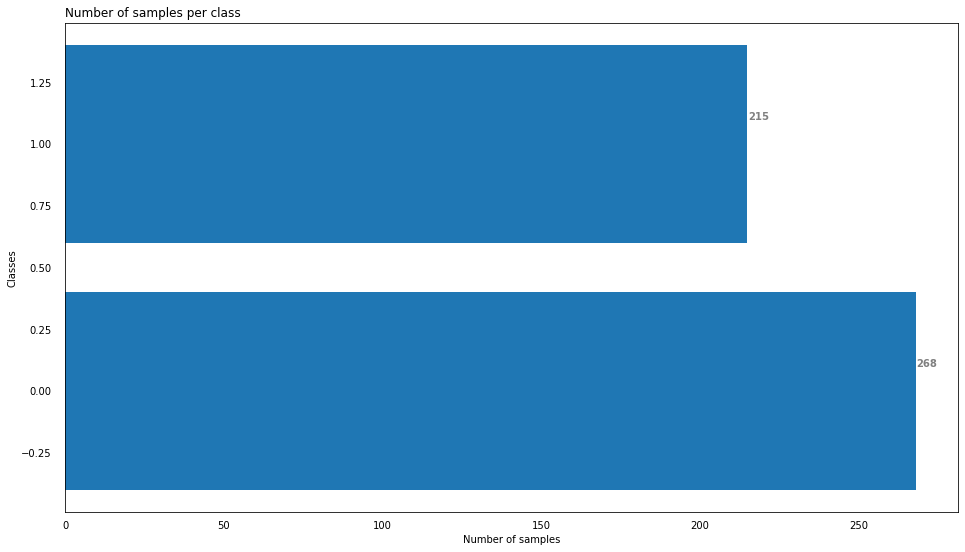

In [ ]:
fig, ax = plt.subplots(figsize =(16, 9))
 
# Horizontal Bar Plot
ax.barh(np.unique(labels), classes)
# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)

# Add Plot Title
ax.set_title('Number of samples per class',loc ='left')
ax.set_xlabel('Number of samples')
ax.set_ylabel('Classes')
for i in ax.patches:
  plt.text(i.get_width()+0.2, i.get_y()+0.5,str(round((i.get_width()), 2)),fontsize = 10, fontweight ='bold',color ='grey')

#**Spliting the initial dataset**

There is no optimal split percentage. One has to come to a split percentage that suits the requirements and meets the model’s needs. 

However, there are two major concerns while deciding on the optimum split:


*   If there is less training data, the machine learning model will show high variance in training
*   With less testing data/validation data, your model evaluation/model performance statistic will have greater variance.

Essentially, you need to come up with an optimum split that suits the need of the dataset/model.

Stratified sampling for splitting a dataset alleviates the problem of Random Sampling in datasets with an imbalanced-class distribution. Here, the distribution of classes in each of the train, validation, and test sets is preserved.

Training data is the set of the data on which the actual training takes place. Validation split helps to improve the model performance by fine-tuning the model after each epoch. 

The **test set** informs us about the final accuracy of the model after completing the training phase.

The **training set** should not be too small; else, the model will not have enough data to learn. 

On the other hand, if the **validation set** is too small, then the evaluation metrics like accuracy, precision, recall, and F1 score will have large variance and will not lead to the proper tuning of the model.

In general, putting 80% of the data in the training set, 10%  in the validation set, and 10% in the test set is a good split to start with.
The optimum split of the test, validation, and train set depends upon factors such as the use case, the structure of the model, dimension of the data, etc.

In [28]:
# Χρησιμοποιούμε τη γνωστή train_test_split για να διαχωρίσουμε σε train και test set
# το (int) όρισμα "random_state" είναι το seed της γεννήτριας τυχαίων αριθμών
import numpy as np
from sklearn.model_selection import train_test_split

# Keep only the features into a numpy array
X = df.iloc[:,:19]
y = df.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=24, stratify=y)

**Curse of dimensionality**

A very important parameter for the performance of classifiers is the dimensionality of the data, especially with respect to the number of samples available. In general and regardless of the classifier model, performance increases as the quantity and quality of the data increases and as the dimensionality decreases. Conversely, problems become more difficult as the dimensionality increases and the samples are not sufficient to cover all classes of the problem.

To reduce the dimensionality of the data, dimensionality reduction techniques are used. The dimensionality reduction is done with feature selection techniques, where some features are essentially removed based on a criterion without transforming their values, and feature extraction techniques, where the feature values are transformed into new ones (that is, new features are extracted) but in a smaller space.


A simple feature selection technique is the minimum variance threshold (**Variance threshold**). In general if the variance of an input feature is very low, it cannot contribute significantly to the discriminating ability of the classifier. Especially in the case that the variance is 0, i.e. the feature has a fixed value for all training samples, it is of no use to the classifier to decide whether a sample belongs to one class or another, and in addition it can complicate other preprocessing procedures such as the normalization of features. 


We can use the VarianceThreshold function to remove features in the training set that have zero (default) or very low variance. We also need to get a mask (index) of the features we choose, so we can apply it to the test data so that they have the same dimensions. This does not break the rule that we do not use the test data because we can consider the classifier to simply ignore inputs that are not included in the mask.








In [ ]:
from sklearn.feature_selection import VarianceThreshold

Xvar = np.var(X_train, axis=0)
print(Xvar)

AgeAtDiagnosis (yrs)                                117.912551
TUMORSTAGE                                            0.879231
TUMORGRADE                                            0.110609
TUMORRESIDUALDISEASE                                  1.521947
OverallSurvival(mos)                                703.754718
ProgressionFreeSurvival (mos)#                      388.095536
PlatinumFreeInterval (mos)*                         312.936596
PRIMARYTHERAPYOUTCOMESUCCESS_COMPLETE RESPONSE        0.213112
PRIMARYTHERAPYOUTCOMESUCCESS_PARTIAL RESPONSE         0.129161
PRIMARYTHERAPYOUTCOMESUCCESS_PROGRESSIVE DISEASE      0.083588
PRIMARYTHERAPYOUTCOMESUCCESS_STABLE DISEASE           0.059461
PERSONNEOPLASMCANCERSTATUS_TUMOR FREE                 0.197260
PERSONNEOPLASMCANCERSTATUS_WITH TUMOR                 0.197260
ProgressionFreeStatus_DiseaseFree                     0.209167
ProgressionFreeStatus_Recurred/Progressed             0.209167
PlatinumStatus_Missing                                0

**Note:**

---



In an initial attempt to evaluate the dispersions of each attribute, we observe a large variation between AgeAtDiagnosis (yrs), OverallSurvival(mos), ProgressionFreeSurvival (mos)# ,PlatinumFreeInterval (mos)* and the rest of the attruibutes. This is because the rest of the attributes are integer values from 0 to 6, while the first 4 Features are continuous values. Therefore, the normalization of the features is deemed necessary.

**Feature normalization**

After feature selection the next preprocessing technique we can do is feature normalization. Features with very large differences in their absolute values can cause problems in training and yield classifiers with suboptimal performance. For example, a feature with very large values will have a greater effect on the kNN distance calculation than one with small values, without necessarily being more decisive for separating the classes. Normalization transforms feature values to smooth out these differences.

The normalization of the features can be done in 2 basic ways, also known from statistics:



* By dividing by the min-max difference (feature scaling) so the values of all features are scaled linearly in the interval [0,1]
* with the z-score (or standard score) of each characteristic (standardization), which makes the characteristic have a mean value of zero and a variance of one, like the normal distribution.
In practice, we don't care if the actual distribution of features is normal, we just subtract the mean and divide by the variance to get the features.

Conversion to standard score is necessary in many classifiers to behave correctly. It is also more resistant than min-max to outlier values, i.e. sporadic values that are very far from the average value and the rest of the characteristic values (min-max will compress most values in a small interval)

On the other hand, scaling to [0,1] is less sensitive to very small deviations and also in sparse feature vectors (i.e. with many zero values) its application preserves the zeros, which can be decisive for training speed.

In [ ]:
from sklearn import preprocessing
#standardization
# όριζουμε ένα αντικείμενο scaler και το κάνουμε fit στο train set
standard_scaler = preprocessing.StandardScaler()
X_train_scaled = standard_scaler.fit_transform(X_train)
# εφαρμόζουμε τον scaler στα δεδομένα test. ΠΡΟΣΟΧΗ μέθοδος transform, όχι fit!
X_test_scaled = standard_scaler.transform(X_test)

In [ ]:
#X_train_scaled
Xvar = np.var(X_train_scaled, axis=0)
print(Xvar)

[nan nan nan nan nan  1. nan nan nan nan nan nan nan  1.  1. nan nan nan
 nan]


In [ ]:
# min max scaling
min_max_scaler = preprocessing.MinMaxScaler()
X_train_minmax = min_max_scaler.fit_transform(X_train)
X_test_minmax = min_max_scaler.transform(X_test)

X_train_minmax
Xvar = np.var(X_train_minmax, axis=0)
print(Xvar)

[       nan        nan        nan        nan        nan 0.01195434
        nan        nan        nan        nan        nan        nan
        nan 0.20916669 0.20916669        nan        nan        nan
        nan]


**Note**:
Obviously it didn't work as we have many NaN values, so the normalization failed. We will try again in our gridsearch parameter tuning.

The most basic feature extraction technique is principal components analysis(PCA) where we analyze the data into principal components and work with completely new, linearly uncorrelated variables of smaller dimension.

 ## Principal component analysis

Principal component analysis (PCA) is the widely used dimensionality reduction method. We will not go into depth here either, but we will descriptively explain the principles of the method. First we calculate the correlation matrix (covariance matrix) of the variables we have in the data. From this matrix we find the linearly correlated variables and by finding the eigenvectors of the matrix we can transform the matrix with an orthogonal transformation and find the basis of the new matrix. This space basis constitutes a new set of variables that are *linearly uncorrelated* and are called principal components.

![alt text](https://i.imgur.com/s5CfXoy.png)

**Note:**

An applied example is following in order to show the usefulness of PCA for visualization purposes. However, PCA can be fitted in sets that do not contain misssing values. So firstly we have to apply knn imputer with number of neighboors based on the best score from grid search procedure. The best combination was this including knn imputer with 4 neighboors.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
imputer = KNNImputer( n_neighbors=4)
# fit on the dataset
imputer.fit(X_train)
# transform the dataset
Xtrans = imputer.transform(X_train)

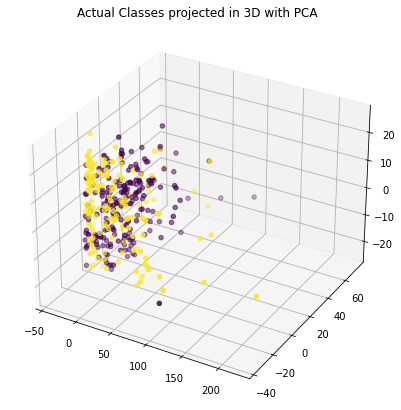

In [ ]:
#3D visualization
from mpl_toolkits import mplot3d
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

X3 = PCA(n_components =3).fit_transform(Xtrans)

# Creating figure
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")

ax.scatter3D(X3[:,0], X3[:,1], X3[:,2], c = y_train)
plt.title('Actual Classes projected in 3D with PCA')
plt.show()

[]

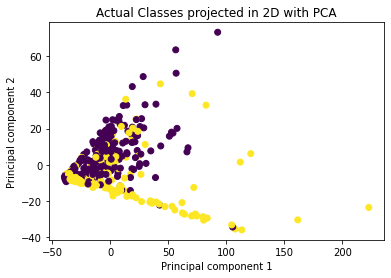

In [ ]:
#2D visualization
X2 = PCA(n_components = 2).fit_transform(Xtrans)

plt.scatter(X2[:,0], X2[:,1], c = y_train)
plt.title('Actual Classes projected in 2D with PCA')
plt.xlabel('Principal component 1')
plt.ylabel('Principal component 2')

plt.plot()

In [ ]:
imputer = KNNImputer( n_neighbors=4)
# fit on the dataset
imputer.fit(X_test)
# transform the dataset
Xtest_trans = imputer.transform(X_test)

**Note**:

To see if usefull information is lost we investigate what percentage of variance is explained as a function of the number of principal components. We will plot the same schema for 2 cases, 4 components and 12 components too.

(386, 19)
(386, 15)

(97, 19)
(97, 15)

This is  the cumulative percentage of variance explained by PCAs [0.76166343 0.9063274  0.98348029 0.99756068 0.99849645 0.99904182
 0.99944825 0.99963935 0.99973409 0.99980451 0.99987161 0.99992341
 0.9999632  1.         1.        ]
With just 15 components we can explain the 0.976 of total info of the dataset



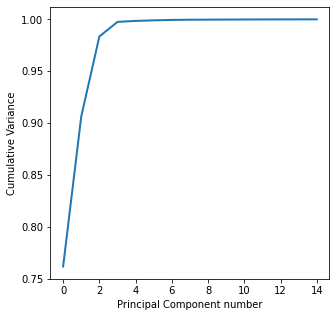

In [ ]:
#διάγραμμα επεξήγησης της διασποράς με n components

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=15)

trainPCA = pca.fit_transform(Xtrans)
testPCA = pca.transform(Xtest_trans)

print(X_train.shape)
print(trainPCA.shape)
print("")
print(X_test.shape)
print(testPCA.shape)
# Θα τυπωσουμε το συσσωρευτικό ποσοστό διασποράς που εξηγείται από τις κύριες συνιστώσες
evar = pca.explained_variance_ratio_
cum_evar = np.cumsum(evar)
print()
print("This is  the cumulative percentage of variance explained by PCAs {}".format(cum_evar))
print("With just 15 components we can explain the {:.3f} of total info of the dataset". format(cum_evar.mean()))
print()
plt.figure(1, figsize=(5, 5))
plt.xlabel("Principal Component number")
plt.ylabel('Cumulative Variance')
plt.plot(cum_evar, linewidth=2)
plt.show()

(386, 19)
(386, 4)

(97, 19)
(97, 4)

This is  the cumulative percentage of variance explained by PCAs [0.76166343 0.9063274  0.98348029 0.99756068]
With just 4 components we can explain the 0.912 of total info of the dataset



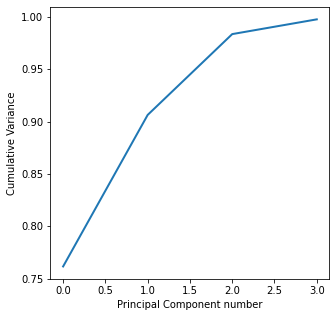

In [ ]:
pca = PCA(n_components=4)

trainPCA = pca.fit_transform(Xtrans)
testPCA = pca.transform(Xtest_trans)

print(X_train.shape)
print(trainPCA.shape)
print("")
print(X_test.shape)
print(testPCA.shape)
# Θα τυπωσουμε το συσσωρευτικό ποσοστό διασποράς που εξηγείται από τις κύριες συνιστώσες
evar = pca.explained_variance_ratio_
cum_evar = np.cumsum(evar)
print()
print("This is  the cumulative percentage of variance explained by PCAs {}".format(cum_evar))
print("With just 4 components we can explain the {:.3f} of total info of the dataset". format(cum_evar.mean()))
print()
plt.figure(1, figsize=(5, 5))
plt.xlabel("Principal Component number")
plt.ylabel('Cumulative Variance')
plt.plot(cum_evar, linewidth=2)
plt.show()

**Note:**

We observe that only 4 components are necessary to include important info of the dataset. To be more specific with 4 pca components 91.2% of total info is explained, while with 15 pca components 97.6% of total info is explained.

**Hyperparameter optimization**

---
Both transformers and estimators have hyper-parameters that need to be optimized by cross-validation. Since both the transformers and the estimator are part of a single pipeline, for the optimal values of all hyper-parameters via cross-validation:

a) for each cross-validation fold, we have to calculate the performance of all possible combinations of transformer hyper-parameters and estimator and

b) we have to select the hyper-parameter combination that has the best average based on some metric across all folds.

**Grid search**

The rendering of all possible combinations of transformer hyper-parameters and estimator is done by grid search. A definition field is defined for each parameter, usually with a minimum, maximum and some step and thus a grid is created with all possible combinations of parameter values.



In summary, hyperparameter optimization requires

- an estimator (a classifier)
- the scope of the hyperparameters
- a way to search for their possible price combinations, eg grid search
- a cross-validation scheme eg 5-fold
- a performance metric (or score) eg F1-macro

In [29]:
from sklearn.dummy import DummyClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score,precision_score,recall_score,roc_auc_score 
from sklearn.model_selection import cross_val_score

In [30]:
from sklearn.model_selection import GridSearchCV
from sklearn.impute import KNNImputer
from sklearn.pipeline import Pipeline
import time
from sklearn.metrics import classification_report

# Apply grid search based on a given model, parameters and metric
def GridSearchCV_Estimator(clf,dict_model,scoring_method,option):


  strategies = list(range(4, 20,5))
  imputer = KNNImputer(n_neighbors=4)
  imputer_components = [4,8,12,16,20]
  selector = VarianceThreshold() 
  if (option == "MinMax"):
    scaler = preprocessing.MinMaxScaler()
  if (option== "Zscore"):
    scaler = preprocessing.StandardScaler()  
  pca = PCA(svd_solver='full') 
  selected_clf = clf
  vthreshold = [0,0.1] # VarianceThreshold parameters
  n_components = [5,10,15] # PCA parameters

  #for s in strategies:
  pipe = Pipeline(steps=[('imputer',imputer),('selector', selector), ('scaler', scaler), ('pca', pca), ('classifier', selected_clf)],memory = 'tmp')
  # pipe = Pipeline(steps=[('imputer',imputer),('selector', selector), ('pca', pca), ('classifier', selected_clf)],memory = 'tmp')

  def_model = dict(imputer__n_neighbors= imputer_components,selector__threshold=vthreshold, pca__n_components=n_components)

  def_model.update(dict_model) # Model parameters

  # Do grid search on a classifier based on given parameters and return 
  # the best
  estimator = GridSearchCV(pipe, def_model, cv=5, scoring=scoring_method,n_jobs=-1)
  estimator.fit(X_train, y_train)
  preds = estimator.predict(X_test)
  acc = accuracy_score(np.array(y_test),preds)
  f1 = f1_score(np.array(y_test),preds)
  prec = precision_score(np.array(y_test),preds)
  rec = recall_score(np.array(y_test),preds)
  auc = roc_auc_score(np.array(y_test),preds)
  print("Accuracy score:",acc)
  # print("F1 score:",f1)
  # print("Precision score:",prec)
  # print("Recall score:",rec)
  print("ROC AUC score:",auc)
  #estimators.append(estimator.best_params_)

  return estimator.best_params_,acc, f1,prec,rec,auc

In [ ]:
# Dictionaries that will contain the accuracy and F1-score
# accuracy_scores = { 'k-nearest neighbors':0, 'LogisticRegression': 0, 'Support Vector Machine':0 , 'Random Forest': 0, 'XBoost' : 0}

accuracy_scores = [{ 'k-nearest neighbors':0, 'LogisticRegression': 0, 'Support Vector Machine':0 , 'Random Forest': 0, 'XBoost' : 0}, # i = 0: Best for accuracy
                   { 'k-nearest neighbors':0, 'LogisticRegression': 0, 'Support Vector Machine':0 , 'Random Forest': 0, 'XBoost' : 0}] # i = 1: Best for AUC

# f1_scores = {'k-nearest neighbors':0,'LogisticRegression': 0, 'Support Vector Machine':0, 'Random Forest': 0, 'XBoost' : 0}

# precision = {'k-nearest neighbors':0,'LogisticRegression': 0, 'Support Vector Machine':0, 'Random Forest': 0, 'XBoost' : 0}

# recall = {'k-nearest neighbors':0,'LogisticRegression': 0, 'Support Vector Machine':0, 'Random Forest': 0, 'XBoost' : 0}

AUC = [{ 'k-nearest neighbors':0, 'LogisticRegression': 0, 'Support Vector Machine':0 , 'Random Forest': 0, 'XBoost' : 0}, # i = 0: Best for accuracy
      { 'k-nearest neighbors':0, 'LogisticRegression': 0, 'Support Vector Machine':0 , 'Random Forest': 0, 'XBoost' : 0}] # i = 1: Best for AUC

# score_methods = ['accuracy','f1','precision','recall','roc_auc']
score_methods = ['accuracy','roc_auc']

#**Classifiers**
# k Nearest Neighbors Classifier (kNN)
kNN is a non-parametric instance-based classifier. Its principle of operation is very simple. For a new sample to be classified, we first compute its k nearest neighbors (in the n-dimensional input feature space) based on some distance function, usually Euclidean:
$$d(x, x') = \sqrt{\left(x_1 - x'_1 \right)^2 + \left(x_2 - x'_2 \right)^2 + \dotsc + \left(x_n - x'_n \right)^2}$$
The class of the new sample will be the class of the majority of k neighbors (we choose odd k in general), either simply calculated (sum) or (inversely) weighted by each neighbor's distance.

kNN has practically no training phase. However, to classify a new sample in the test phase, we need to compare its distance to each sample in the train set. This means that all training samples are necessary for the classification (hence the name "instance-based", while in Naive Bayes we only need the parameters $μ$ and $σ^2$). This means that kNN is more demanding in both space (storing all samples) and time (computing all distances for each new sample).

**Hyper parameter k**

The neighborhood k of kNN is a hyperparameter of the classifier. Another hyperparameter for example is the distance function. Hyperparameters are choices made by the system designer, and we cannot know their optimal values unless we first evaluate them empirically on data. Another example of a hyperparameter is the number of hidden neurons in an MLP. In the case of kNN, k controls the trade-off between variance and variance.

If we set small k, for example k=1, we get a classifier with high variance and low deviation. The classifier tends to ignore the overall distribution and decides only from the closest sample. In the case k=1 the decision boundary (decision boundary) passes through the mid-verticals of neighboring samples of a different class.

![kNN k=1](https://i.stack.imgur.com/UG81y.png "kNN with k=1")

If we choose a larger k, we make a classifier with lower variance and higher variance. It will misclassify more outliers but respect the overall distribution more.

![kNN k=20](https://i.stack.imgur.com/FZITG.png "kNN with k=20")


**Min-max results**

---



In [ ]:
# Grid search based on the two metrics and print the two best models
for i,score_method in enumerate(score_methods):
  model = KNeighborsClassifier()
  model_parameters = dict(classifier__n_neighbors=list(range(4, 20,5)))
  a=GridSearchCV_Estimator(model,model_parameters,score_method,"MinMax")
  print('Best model based on',score_method,':',a[0])
  accuracy_scores[i]['k-nearest neighbors'] =a[1]
  # f1_scores['k-nearest neighbors']=a[2]
  # recall['k-nearest neighbors'] = a[3]
  # precision['k-nearest neighbors'] = a[4]
  AUC[i]['k-nearest neighbors'] = a[5]
  print()

Accuracy score: 0.7010309278350515
ROC AUC score: 0.6722652885443584
Best model based on accuracy : {'classifier__n_neighbors': 4, 'imputer__n_neighbors': 8, 'pca__n_components': 15, 'selector__threshold': 0.1}

Accuracy score: 0.6701030927835051
ROC AUC score: 0.6444875107665806
Best model based on roc_auc : {'classifier__n_neighbors': 14, 'imputer__n_neighbors': 12, 'pca__n_components': 5, 'selector__threshold': 0.1}



**Z-score results**

---



In [ ]:
# Grid search based on the two metrics and print the two best models
for i,score_method in enumerate(score_methods):
  model = KNeighborsClassifier()
  model_parameters = dict(classifier__n_neighbors=list(range(4, 20,5)))
  a=GridSearchCV_Estimator(model,model_parameters,score_method,"Zscore")
  print('Best model based on',score_method,':',a[0])
  accuracy_scores[i]['k-nearest neighbors'] =a[1]
  # f1_scores['k-nearest neighbors']=a[2]
  # recall['k-nearest neighbors'] = a[3]
  # precision['k-nearest neighbors'] = a[4]
  AUC[i]['k-nearest neighbors'] = a[5]
  print()

Accuracy score: 0.6907216494845361
ROC AUC score: 0.6606373815676141
Best model based on accuracy : {'classifier__n_neighbors': 4, 'imputer__n_neighbors': 12, 'pca__n_components': 15, 'selector__threshold': 0.1}

Accuracy score: 0.7319587628865979
ROC AUC score: 0.7071490094745908
Best model based on roc_auc : {'classifier__n_neighbors': 19, 'imputer__n_neighbors': 12, 'pca__n_components': 5, 'selector__threshold': 0.1}



In [ ]:
from numpy import isnan
# print total missing
#print('Missing: %d' % sum(isnan(X_train).flatten()))
# define imputer
imputer = KNNImputer()
# fit on the dataset
imputer.fit(X_train)
# transform the dataset
Xtrans = imputer.transform(X_train)
# print total missing
#print('Missing: %d' % sum(isnan(Xtrans).flatten()))

#**Support Vector Machine (SVM)**


Support Vector Machine (SVM) is a supervised machine learning algorithm used for both classification and regression. However, it is more efficient for sorting. The aim of the SVM algorithm is to find a hyperplane in an N-dimensional space that distinctly classifies the data points. The dimension of the hyperplane depends on the number of features. If the number of input features is two, then the hyperplane is just a line. If the number of input features is three, then the hyperplane becomes a 2D plane.

The SVM kernel is a function that takes a low-dimensional input space and transforms it into a higher-dimensional space,  in fact  it transforms a non-separable problem into a separable problem. It is mainly useful in nonlinear separation problems. The kernel does some very complex data transformations and then figures out the process of separating the data based on the labels or outputs defined. There are three types of kernel: Linear, Rbf and Sigmoid.



**SVM linear Kernel**
The linear kernel is used when the data is linearly separable (or nearly linearly separable), so it can be separated using a single line. It is one of the most common kernels used. It is mainly used when there are a large number of features in a particular data set.



**SVM RBF Kernel**
When the data set is non-linear, it is recommended to use kernel functions such as RBF. For a linearly separable dataset (linear dataset) one could use a linear kernel function (kernel = "linear"). RBF kernels are the most generalized form of kernels and are one of the most widely used kernels due to its similarity to the Gaussian distribution. The RBF kernel function for two points x1 and x2 calculates the similarity or how close they are to each other.


**Sigmoid Kernel**
Sigmoid kernel is mainly preferred for neural networks. This kernel function is similar to a two-layer perceptron model of the neural network, which acts as an activation function for neurons.


In [32]:
SEED_NUMBER = 2000
from sklearn.svm import SVC

**Min-max results**

---



In [ ]:
# Grid search based on the two metrics and print the two best models

for i,score_method in enumerate(score_methods):
  model = SVC(random_state=SEED_NUMBER)
  model_parameters = dict(classifier__kernel=['linear','rbf','sigmoid'])
  a=GridSearchCV_Estimator(model,model_parameters,score_method,"MinMax")
  print('Best model based on',score_method,':',a[0])
  accuracy_scores[i]['Support Vector Machine'] =a[1]
  #f1_scores['Support Vector Machine']=a[2]
  #recall['Support Vector Machine'] = a[3]
  #precision['Support Vector Machine'] = a[4]
  AUC[i]['Support Vector Machine'] = a[5]
  print()


Accuracy score: 0.7422680412371134
ROC AUC score: 0.7093023255813954
Best model based on accuracy : {'classifier__kernel': 'rbf', 'imputer__n_neighbors': 4, 'pca__n_components': 5, 'selector__threshold': 0.1}

Accuracy score: 0.7422680412371134
ROC AUC score: 0.7093023255813954
Best model based on roc_auc : {'classifier__kernel': 'linear', 'imputer__n_neighbors': 4, 'pca__n_components': 15, 'selector__threshold': 0.1}



**Z-score results**

---



In [ ]:
for i,score_method in enumerate(score_methods):
  model = SVC(random_state=SEED_NUMBER)
  model_parameters = dict(classifier__kernel=['linear','rbf','sigmoid'])
  a=GridSearchCV_Estimator(model,model_parameters,score_method,"Zscore")
  print('Best model based on',score_method,':',a[0])
  accuracy_scores[i]['Support Vector Machine'] =a[1]
  #f1_scores['Support Vector Machine']=a[2]
  #recall['Support Vector Machine'] = a[3]
  #precision['Support Vector Machine'] = a[4]
  AUC[i]['Support Vector Machine'] = a[5]
  print()


Accuracy score: 0.7216494845360825
ROC AUC score: 0.6931524547803617
Best model based on accuracy : {'classifier__kernel': 'rbf', 'imputer__n_neighbors': 4, 'pca__n_components': 10, 'selector__threshold': 0.1}

Accuracy score: 0.7010309278350515
ROC AUC score: 0.6722652885443584
Best model based on roc_auc : {'classifier__kernel': 'linear', 'imputer__n_neighbors': 12, 'pca__n_components': 5, 'selector__threshold': 0.1}



#**Logistic Regression** 

---


Logistic regression is a fundamental classification technique. It belongs to the group of linear classifiers and is somewhat similar to polynomial and linear regression. It is fast and relatively uncomplicated. Although it’s essentially a method for binary classification, it can also be applied to multiclass problems.

It is used for predicting the categorical dependent variable using a given set of independent variables. Logistic regression predicts the output of a categorical dependent variable, so the outcome must be a categorical or discrete value. 

In Logistic regression, instead of fitting a regression line,  an "S" shaped logistic function is fitted, which predicts two maximum values (0 or 1). The curve from the logistic function indicates the likelihood of something such as whether the cells are cancerous or not, a mouse is obese or not based on its weight, etc.

Logistic Regression is a significant machine learning algorithm because it has the ability to provide probabilities and classify new data using continuous and discrete datasets.


In [ ]:
from sklearn.linear_model import LogisticRegression

**Min-max results**

---

In [ ]:
# Grid search based on the two metrics and print the two best models
for i,score_method in enumerate(score_methods):
  #,classifier__solver=["lbfgs", "liblinear", "newton-cg", "newton-cholesky", "sag","saga"]
  model = LogisticRegression(random_state=SEED_NUMBER,solver='liblinear')
  model_parameters = dict(classifier__C = np.logspace(-4, 4, 5),classifier__penalty=['l1', 'l2'])
  a = GridSearchCV_Estimator(model,model_parameters,score_method,"MinMax")
  print('Best model based on',score_method,':',a[0])
  accuracy_scores[i]['LogisticRegression'] =a[1]
 # f1_scores['LogisticRegression']=a[2]
 # recall['LogisticRegression'] = a[3]
 # precision['LogisticRegression'] = a[4]
  AUC[i]['LogisticRegression'] = a[5]
  print()

Accuracy score: 0.7422680412371134
ROC AUC score: 0.7235142118863049
Best model based on accuracy : {'classifier__C': 100.0, 'classifier__penalty': 'l1', 'imputer__n_neighbors': 4, 'pca__n_components': 15, 'selector__threshold': 0}

Accuracy score: 0.7010309278350515
ROC AUC score: 0.6770025839793281
Best model based on roc_auc : {'classifier__C': 1.0, 'classifier__penalty': 'l2', 'imputer__n_neighbors': 12, 'pca__n_components': 15, 'selector__threshold': 0.1}



**Z-score results**

---

In [ ]:
for i,score_method in enumerate(score_methods):
  #,classifier__solver=["lbfgs", "liblinear", "newton-cg", "newton-cholesky", "sag","saga"]
  model = LogisticRegression(random_state=SEED_NUMBER,solver='liblinear')
  model_parameters = dict(classifier__C = np.logspace(-4, 4, 5),classifier__penalty=['l1', 'l2'])
  a = GridSearchCV_Estimator(model,model_parameters,score_method,"Zscore")
  print('Best model based on',score_method,':',a[0])
  accuracy_scores[i]['LogisticRegression'] =a[1]
 # f1_scores['LogisticRegression']=a[2]
 # recall['LogisticRegression'] = a[3]
 # precision['LogisticRegression'] = a[4]
  AUC[i]['LogisticRegression'] = a[5]
  print()

Accuracy score: 0.7731958762886598
ROC AUC score: 0.7512919896640827
Best model based on accuracy : {'classifier__C': 1.0, 'classifier__penalty': 'l1', 'imputer__n_neighbors': 4, 'pca__n_components': 15, 'selector__threshold': 0}

Accuracy score: 0.7010309278350515
ROC AUC score: 0.6770025839793281
Best model based on roc_auc : {'classifier__C': 0.01, 'classifier__penalty': 'l2', 'imputer__n_neighbors': 12, 'pca__n_components': 15, 'selector__threshold': 0.1}



**Random Forest Classifier**

Random forests are for supervised machine learning tasks, where there is a labeled target variable. Random forests are an ensemble method, meaning they combine predictions from other models. Each of the smaller models in the random forest ensemble is a decision tree.

The Random forest classifier creates a set of decision trees from a randomly selected subset of the training set. It is basically a set of decision trees (DT) from a randomly selected subset of the training set and then It collects the votes from different decision trees to decide the final prediction.

The main challenge of Random Forest is to find the important features that radically define the root node and every level of the tree. The latter procedure is known as feature selection. Both in Decision Trees and therefore in Random Forests there are two popular measures; Gini index and Information Gain based on Entropy. 

In [ ]:
from sklearn.ensemble import RandomForestClassifier

**Min-max results**

---

In [ ]:
# Grid search based on the two metrics and print the two best models
for i,score_method in enumerate(score_methods):
  model = RandomForestClassifier(random_state=SEED_NUMBER)
  model_parameters = dict(classifier__criterion=['gini','entropy'],
                          classifier__max_depth=[5,7]
                          )
  a = GridSearchCV_Estimator(model,model_parameters,score_method,"MinMax")
  print('Best model based on',score_method,':',a[0])
  accuracy_scores[i]['Random Forest'] = a[1]
  # f1_scores['Random Forest'] = a[2]
  # recall['Random Forest'] = a[3]
  # precision['Random Forest'] = a[4]
  AUC[i]['Random Forest'] = a[5]
  print()

Accuracy score: 0.711340206185567
ROC AUC score: 0.6862618432385874
Best model based on accuracy : {'classifier__criterion': 'entropy', 'classifier__max_depth': 7, 'imputer__n_neighbors': 20, 'pca__n_components': 15, 'selector__threshold': 0}

Accuracy score: 0.7010309278350515
ROC AUC score: 0.6722652885443584
Best model based on roc_auc : {'classifier__criterion': 'entropy', 'classifier__max_depth': 7, 'imputer__n_neighbors': 16, 'pca__n_components': 15, 'selector__threshold': 0.1}



**Z-score results**

---

In [ ]:
# Grid search based on the two metrics and print the two best models
for i,score_method in enumerate(score_methods):
  model = RandomForestClassifier(random_state=SEED_NUMBER)
  model_parameters = dict(classifier__criterion=['gini','entropy'],
                          classifier__max_depth=[5,7]
                          )
  a = GridSearchCV_Estimator(model,model_parameters,score_method,"Zscore")
  print('Best model based on',score_method,':',a[0])
  accuracy_scores[i]['Random Forest'] = a[1]
  # f1_scores['Random Forest'] = a[2]
  # recall['Random Forest'] = a[3]
  # precision['Random Forest'] = a[4]
  AUC[i]['Random Forest'] = a[5]
  print()

Accuracy score: 0.7422680412371134
ROC AUC score: 0.72114556416882
Best model based on accuracy : {'classifier__criterion': 'entropy', 'classifier__max_depth': 7, 'imputer__n_neighbors': 16, 'pca__n_components': 15, 'selector__threshold': 0.1}

Accuracy score: 0.6701030927835051
ROC AUC score: 0.6515934539190354
Best model based on roc_auc : {'classifier__criterion': 'entropy', 'classifier__max_depth': 5, 'imputer__n_neighbors': 12, 'pca__n_components': 5, 'selector__threshold': 0.1}



**Boosting**

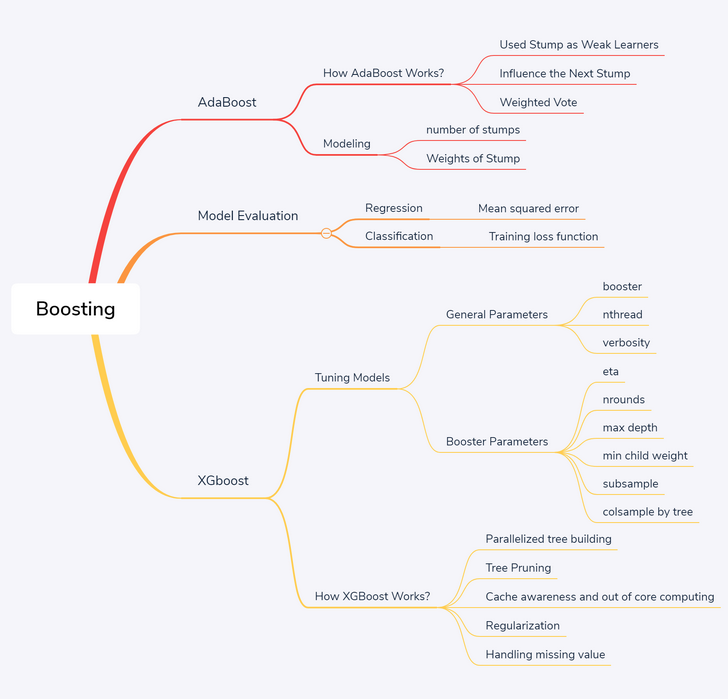

Parallelized tree building:

> XGBoost approaches the process of sequential tree building using parrellelized implementation.

Tree pruning:

> Unlike GBM, where tree pruning stops once a negative loss is encountered, XGBoost grows the tree up to max_depth and then prune backward until the improvement in loss function is below a threshold.

Cache awareness and out of core computing:

> XGBoost has been designed to efficiently reduce computing time and allocate an optimal usage of memory resources. This is accomplished by cache awareness by allocating internal buffers in each thread to store gradient statistics. Further enhancements such as ‘out-of-core’ computing optimize available disk space while handling big data-frames that do not fit into memory.

Regularization:

> The biggest advantage of xgboost is regularization. Regularization is a technique used to avoid overfitting in linear and tree based models which limits, regulates or shrink the estimated coefficient towards zero.

Handles missing value:

> This algorithm has important features of handling missing values by learns the best direction for missing values. The missing values are treated them to combine a sparsity-aware split finding algorithm to handle different types of sparsity patterns in data.

Built-in cross validation:

> The algorithm comes with built in cross validation method at each iteration, taking away the need to explicitly program this search and to specify the exact number of boosting iterations required in a single run.

In [ ]:
from xgboost import XGBClassifier

In [ ]:
xgb = XGBClassifier(seed=SEED_NUMBER)

In [ ]:
# Grid search based on the two metrics and print the two best models
for i,score_method in enumerate(score_methods):
  model = XGBClassifier(seed=SEED_NUMBER, learning_rate=0.02,
                        objective='binary:logistic',)
  model_parameters = dict(classifier__subsample=[0.5, 0.8, 1],
                          classifier__max_depth=[3,5],
                          classifier__gamma=[0.5, 2])
  a = GridSearchCV_Estimator(model,model_parameters,score_method,"MinMax")
  print('Best model based on',score_method,':',a[0])
  accuracy_scores[i]['XBoost'] =a[1]
  # f1_scores['XBoost']=a[2]
  # recall['XBoost'] = a[3]
  # precision['XBoost'] = a[4]
  AUC[i]['XBoost'] = a[5]
  print()

Accuracy score: 0.7010309278350515
ROC AUC score: 0.6770025839793281
Best model based on accuracy : {'classifier__gamma': 2, 'classifier__max_depth': 5, 'classifier__subsample': 1, 'imputer__n_neighbors': 12, 'pca__n_components': 15, 'selector__threshold': 0.1}

Accuracy score: 0.7628865979381443
ROC AUC score: 0.7349267872523686
Best model based on roc_auc : {'classifier__gamma': 2, 'classifier__max_depth': 3, 'classifier__subsample': 0.8, 'imputer__n_neighbors': 16, 'pca__n_components': 15, 'selector__threshold': 0}



In [ ]:
# Grid search based on the two metrics and print the two best models
for i,score_method in enumerate(score_methods):
  model = XGBClassifier(seed=SEED_NUMBER, learning_rate=0.02,
                        objective='binary:logistic',)
  model_parameters = dict(classifier__subsample=[0.5, 0.8, 1],
                          classifier__max_depth=[3,5],
                          classifier__gamma=[0.5, 2])
  a = GridSearchCV_Estimator(model,model_parameters,score_method,"Zscore")
  print('Best model based on',score_method,':',a[0])
  accuracy_scores[i]['XBoost'] =a[1]
  # f1_scores['XBoost']=a[2]
  # recall['XBoost'] = a[3]
  # precision['XBoost'] = a[4]
  AUC[i]['XBoost'] = a[5]
  print()


Accuracy score: 0.7525773195876289
ROC AUC score: 0.7256675279931095
Best model based on accuracy : {'classifier__gamma': 0.5, 'classifier__max_depth': 3, 'classifier__subsample': 1, 'imputer__n_neighbors': 16, 'pca__n_components': 15, 'selector__threshold': 0}

Accuracy score: 0.7010309278350515
ROC AUC score: 0.6841085271317829
Best model based on roc_auc : {'classifier__gamma': 2, 'classifier__max_depth': 5, 'classifier__subsample': 1, 'imputer__n_neighbors': 8, 'pca__n_components': 5, 'selector__threshold': 0.1}



**Summary table of best models based on metric and normaliazation processing method**

---



|                         |                        |                                                                                        |                   |                                                                                         |
|-------------------------|------------------------|----------------------------------------------------------------------------------------|-------------------|-----------------------------------------------------------------------------------------|
| **Classifier**          | **Accuracy based (%)** | **Parameters (based on accuracy)**                                                     | **AUC based (%)** | **Parameters (based on AUC)**                                                           |
| **K-NN**                | 70.1 (Min-max)         | k: 4, k-imputer: 8, pca comp: 15,variance thres: 0.1                                   | 70.7 (Z-score)    | k: 19, k-imputer: 12, pca comp: 5,variance thres: 0.1                                   |
| **SVM**                 | 74.2 (Min-max)         | kernel': 'rbf', k-imputer: 4, pca comp: 5, variance thres: 0.1                         | 70.9 (Min-max)    | kernel': linear', k-imputer: 4, pca comp: 15, variance thres: 0.1                       |
| **Logistic Regression** | 77.31 (Zscore)         | C: 1.0, penalty: 'l1', k-imputer: 4, pca comp: 15, variance thres: 0                   | 67.7 (Zscore)     | C: 0.01, penalty: 'l2', k-imputer: 12, pca comp: 15, variance thres: 0.1                |
| **Random Forest**       | 74.22 (Zscore)         | criterion: 'entropy', max depth: 7, k-imputer: 16, pca comp: 15, variance thres: 0.1   | 67.22 (Min-Max)   | criterion: 'entropy', max depth': 7, k-imputer: 16, pca comp: 15, variance thres: 0.1   |
| **XBoost**              | 75.25 (Zscore)         | gamma: 0.5, max depth: 3, subsample: 1, k-imputer: 16, pca comp: 15, variance thres: 0 | 73.49 (Min-Max)   | gamma: 2, max depth': 3, subsample: 0.8, k-imputer: 16, pca comp: 15, variance thres: 0 |


**Note:**

We observe that best accuracy score is equal to 77.31% spotted in logistic regression classifier with z-score normalization, while the best AUC score is equal to 73.49% spotted in Xboost classifier with Min-max normalization technique applied.

**Metrics for the best models**

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


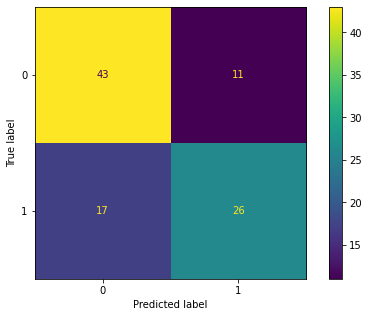

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import VarianceThreshold
import seaborn as sns
from sklearn.metrics import plot_confusion_matrix

imputer = KNNImputer(n_neighbors=4)

scaler = preprocessing.StandardScaler()

selector = VarianceThreshold(threshold=0)

pca = PCA(n_components = 15)

model = LogisticRegression(random_state=SEED_NUMBER,solver='liblinear',C=1.0,penalty='l1')

pipe = Pipeline(steps=[('imputer',imputer),('selector', selector), ('scaler', scaler), ('pca', pca), ('classifier', model)],memory = 'tmp')

pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)


fig, ax = plt.subplots(figsize=(8, 5))
plot_confusion_matrix(
    pipe, 
    X_test,
    y_test,
    ax=ax,
)

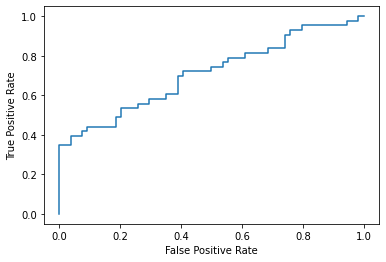

In [41]:
from xgboost import XGBClassifier
from sklearn import metrics

imputer = KNNImputer(n_neighbors=16)

scaler = preprocessing.MinMaxScaler()

selector = VarianceThreshold(threshold=0)

pca = PCA(n_components = 15)

model = XGBClassifier(seed=SEED_NUMBER, learning_rate=0.02,
                      objective='binary:logistic',subsample=0.8, 
                      max_depth=3, gamma=2) 

pipe = Pipeline(steps=[('imputer',imputer),('selector', selector), ('scaler', scaler), ('pca', pca), ('classifier', model)],memory = 'tmp')

pipe.fit(X_train, y_train)

y_pred_proba = pipe.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()